# 관광추천지수가설1 적용

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


전처리 과정 끝난 VERSION
--

In [1]:
# 구글 공유 드라이브에 전처리가 완료된 파일

import pandas as pd
seoul=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/seoul.csv')
GyeongBokGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/GyeongBokGung.csv')
NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/NationalMuseumOfKorea.csv')
NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/NamSanGolHanOkVillage.csv')
DuckSooGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/DuckSooGung.csv')
SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoDaeMunNaturalHistoryMuseum.csv')
SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoDaeMunPrisonHistoryMuseum.csv')
SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SeoulMuseumOfArt.csv')
SunReungJungReung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/SunReungJungReung.csv')
JongMyo=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/JongMyo.csv')
ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/ChangGyeongGung.csv')
ChangDeokGung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/ChangDeokGung.csv')
TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/TaeReungGangNeung.csv')
TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/TrickEyeMuseum.csv')
HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/웨더고프로젝트/ver1(210717)/HeonLeungInReung.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install catboost

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost 
import lightgbm 
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import catboost

In [5]:
#GyeongBokGung=GyeongBokGung.iloc[:, 1:]
#NationalMuseumOfKorea=NationalMuseumOfKorea.iloc[:, 1:]
#NamSanGolHanOkVillage=NamSanGolHanOkVillage.iloc[:, 1:]
#DuckSooGung=DuckSooGung.iloc[:, 1:]
#SeoDaeMunNaturalHistoryMuseum=SeoDaeMunNaturalHistoryMuseum.iloc[:, 1:]
#SeoDaeMunPrisonHistoryMuseum=SeoDaeMunPrisonHistoryMuseum.iloc[:, 1:]
#SeoulMuseumOfArt=SeoulMuseumOfArt.iloc[:, 1:]
#SunReungJungReung=SunReungJungReung.iloc[:, 1:]
#JongMyo=JongMyo.iloc[:, 1:]
#ChangGyeongGung=ChangGyeongGung.iloc[:, 1:]
#ChangDeokGung=ChangDeokGung.iloc[:, 1:]
#TaeReungGangNeung=TaeReungGangNeung.iloc[:, 1:]
#TrickEyeMuseum=TrickEyeMuseum.iloc[:, 1:]
#HeonLeungInReung=HeonLeungInReung.iloc[:, 1:]

In [6]:
# 원래는 기온, 습도으로 해주어야 하나, 여기서는 평균 기온과 평균 습도로 열지수의 평균을 구해주도록 하겠다.
seoul['열지수']=0
i=0

for i in range(0,108):
    Tc=seoul.loc[i, '평균 기온(°C)']
    T=(Tc*1.8)+32
    R=seoul.loc[i, '평균 상대습도(%)']*1/100
    
    h1= -42.379
    h2=2.04901523*T
    h3=10.14333127*R
    h4=-0.22475541*T*R
    h5=-6.83783*(pow(10, -3))*((pow(T, 2)))
    h6=-5.481717*(pow(10, -2))*(pow(R, 2))
    h7=1.22874*(pow(10,-3))*T*R
    h8=8.5282*(pow(10, -4))*T*(pow(R, 2))
    h9=-1.99*(pow(10, -6))*(pow(T, 2))*(pow(R, 2))
    
    Heat_index=h1+h2+h3+h4+h5+h6+h7+h8+h9
    
    seoul['열지수'][i]=Heat_index
    i+=1

In [7]:
today=seoul.iloc[-1:, :]
today

,Unnamed: 0,date,year,month,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,월별합계,열지수
107,107,201912,2019,12,1.416129,-2.603226,1100.548387,5.274194,1325.806452,3.973158,1.189474,7.587097,231.935484,1210.709677,4.4,222.903226,1095.322581,2.125806,1840.193548,182.903226,-6.53871,37.129032,1170.354839,57.754839,4.203226,1014.948387,1028.96129,1101.709677,1022.548387,1176.258065,1025.777419,9.641935,5.296774,1193.548387,1.375806,7.201613,4.416129,3.441935,1.609677,-6.470968,2.474194,3.274194,4.145161,5.035484,5.819355,9.025806,11.845161,16.735484,17.516129,1.690323,1.25,239734,34711,24830,53852,68460,112314,97041,268274,1754,17542,53841,4146.0,3415,13513.0,993427,21


전처리 과정 안 끝난 버전
--

In [8]:
# 처음에 내가 만든 14개의 데이터 프레임

b_GyeongBokGung=pd.read_csv('/content/drive/MyDrive/경복궁.csv')
b_NationalMuseumOfKorea=pd.read_csv('/content/drive/MyDrive/국립중앙박물관.csv')
b_NamSanGolHanOkVillage=pd.read_csv('/content/drive/MyDrive/남산골한옥마을.csv')
b_DuckSooGung=pd.read_csv('/content/drive/MyDrive/덕수궁.csv')
b_SeoDaeMunNaturalHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문자연사박물관.csv')
b_SeoDaeMunPrisonHistoryMuseum=pd.read_csv('/content/drive/MyDrive/서대문형무소역사관.csv')
b_SeoulMuseumOfArt=pd.read_csv('/content/drive/MyDrive/서울시립미술관.csv')
b_SunReungJungReung=pd.read_csv('/content/drive/MyDrive/선릉정릉.csv')
b_JongMyo=pd.read_csv('/content/drive/MyDrive/종묘.csv')
b_ChangGyeongGung=pd.read_csv('/content/drive/MyDrive/창경궁.csv')
b_ChangDeokGung=pd.read_csv('/content/drive/MyDrive/창덕궁.csv')
b_TaeReungGangNeung=pd.read_csv('/content/drive/MyDrive/태릉강릉조선왕릉전시관.csv')
b_TrickEyeMuseum=pd.read_csv('/content/drive/MyDrive/트릭아이미술관.csv')
b_HeonLeungInReung=pd.read_csv('/content/drive/MyDrive/헌릉인릉.csv')

In [9]:
b_GyeongBokGung=b_GyeongBokGung.iloc[:, 1:]
b_NationalMuseumOfKorea=b_NationalMuseumOfKorea.iloc[:, 1:]
b_NamSanGolHanOkVillage=b_NamSanGolHanOkVillage.iloc[:, 1:]
b_DuckSooGung=b_DuckSooGung.iloc[:, 1:]
b_SeoDaeMunNaturalHistoryMuseum=b_SeoDaeMunNaturalHistoryMuseum.iloc[:, 1:]
b_SeoDaeMunPrisonHistoryMuseum=b_SeoDaeMunPrisonHistoryMuseum.iloc[:, 1:]
b_SeoulMuseumOfArt=b_SeoulMuseumOfArt.iloc[:, 1:]
b_SunReungJungReung=b_SunReungJungReung.iloc[:, 1:]
b_JongMyo=b_JongMyo.iloc[:, 1:]
b_ChangGyeongGung=b_ChangGyeongGung.iloc[:, 1:]
b_ChangDeokGung=b_ChangDeokGung.iloc[:, 1:]
b_TaeReungGangNeung=b_TaeReungGangNeung.iloc[:, 1:]
b_TrickEyeMuseum=b_TrickEyeMuseum.iloc[:, 1:]
b_HeonLeungInReung=b_HeonLeungInReung.iloc[:, 1:]

# Heatmap(Corr) & Statsmodels (전처리 이후)


In [10]:
def heatmap(df):
    df=df
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.figure(figsize=(20,20))
    mask = np.zeros_like(df.corr(), dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(data=df.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel2')
    plt.show()

In [11]:
def statsmodel(df):
    x=df.drop(['target'], axis=1)
    y=df['target']
    x_constant=sm.add_constant(x)
    model_1=sm.OLS(y,x_constant)
    lin_reg=model_1.fit()
    view=lin_reg.summary()
    return view

In [12]:
def target_distplot(df):
    df=df
    sns.distplot(df['target'])

In [13]:
def statsmodel_2(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]
    x_constant=sm.add_constant(x)
    model_1=sm.OLS(y,x_constant)
    lin_reg=model_1.fit()
    view=lin_reg.summary()
    return view

In [14]:
def target_distplot_2(df):
    df=df
    y=df.iloc[:, -1]
    sns.distplot(y)

GyeongBokGung
--

- 전처리 이후

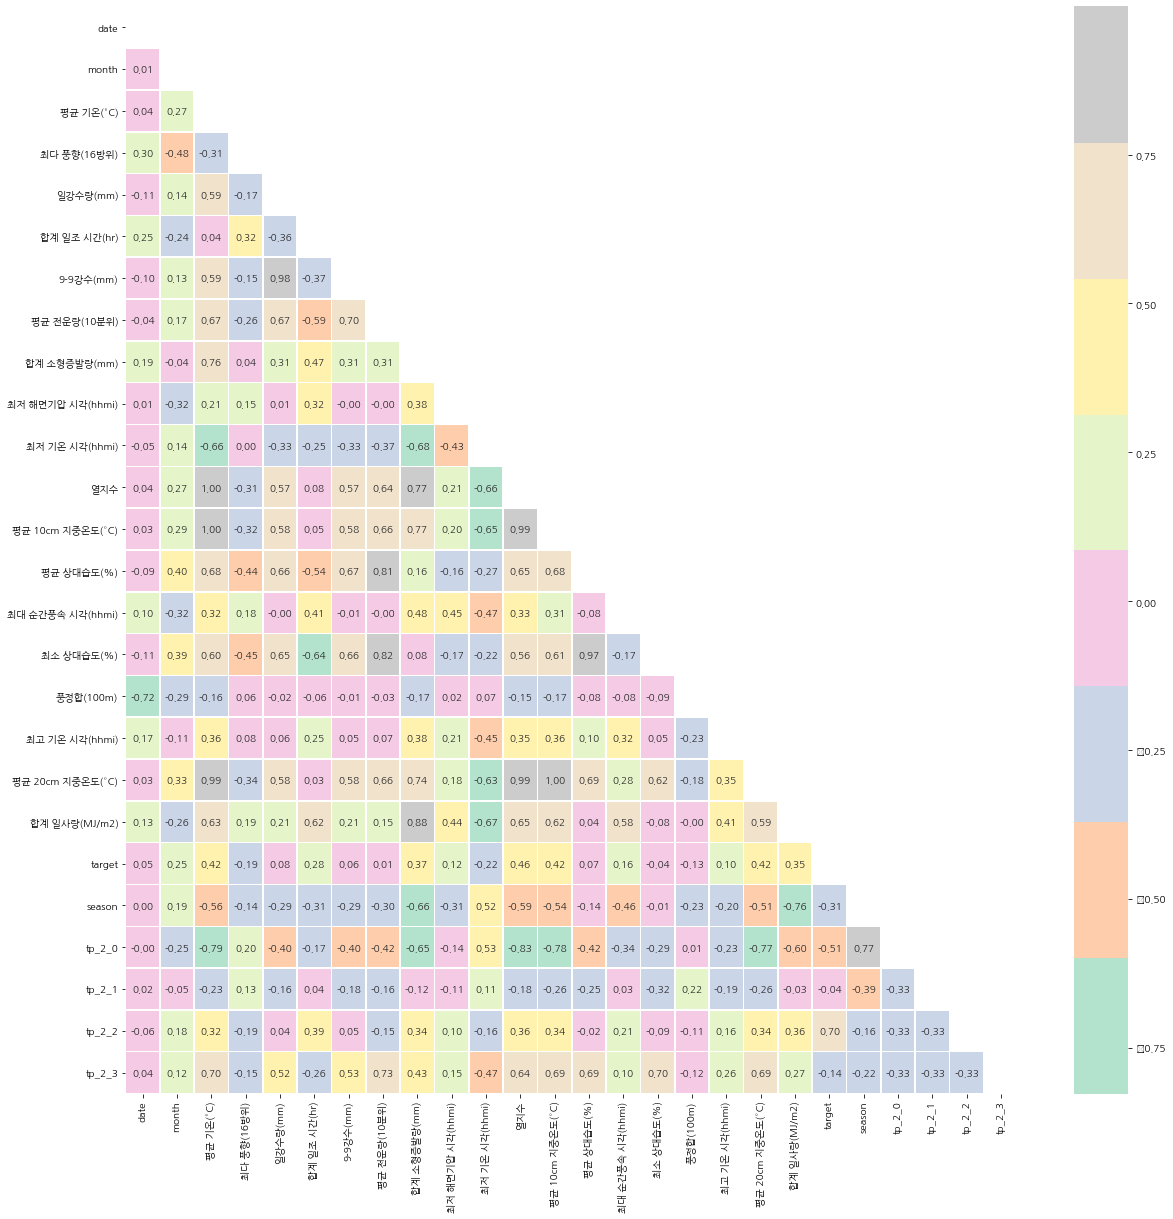

In [ ]:
heatmap(GyeongBokGung)

In [ ]:
statsmodel(GyeongBokGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     7.660
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.14e-12
Time:                        07:38:57   Log-Likelihood:                -1356.9
No. Observations:                 108   AIC:                             2764.
Df Residuals:                      83   BIC:                             2831.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.186e+06   1.01e+07     -0.610      0.544   -2.64e+07     1.4e+07
date                40.5929     63.134      0.643      0.522     -84.978     166.164
month            -2405.8991   4254.855     -0.565      0.573   -1.09e+04    6056.836
평균 기온(°C)        -4.469e+04   2.59e+04     -1.724      0.089   -9.63e+04    6879.420
최다 풍향(16방위)        150.5798    308.356      0.488      0.627    -462.727     763.887
일강수량(mm)          7984.8199   6707.850      1.190      0.237   -5356.824    2.13e+04
합계 일조 시간(hr)     -1.457e+04   1.93e+04     -0.755      0.452   -5.29e+04    2.38e+04
9-9강수(mm)        -1.014e+04   6999.311     -1.449      0.151   -2.41e+04    3781.842
평균 전운량(10분위)     -4537.2305    2.2e+04     -0.206      0.837   -4.83e+04    3.92e+04
합계 소형증발량(mm)     -1.072e+04    1.9e+04     -0.564      0.574   -4.86e+04    2.71e+04
최저 해면기압 시각(hhmi)    68.3454     89.689      0.762      0.448    -110.043     246.733
최저 기온 시각(hhmi)     -19.9777     87.170     -0.229      0.819    -193.355     153.399
열지수               1.978e+04   9225.907      2.144      0.035    1427.550    3.81e+04
평균 10cm 지중온도(°C)  4.711e+04   4.82e+04      0.977      0.332   -4.88e+04    1.43e+05
평균 상대습도(%)        6822.1491   5763.860      1.184      0.240   -4641.936    1.83e+04
최대 순간풍속 시각(hhmi)  -149.6287    109.108     -1.371      0.174    -366.640      67.383
최소 상대습도(%)       -1.081e+04   5637.288     -1.918      0.059    -2.2e+04     398.297
풍정합(100m)           -8.8883     39.520     -0.225      0.823     -87.492      69.716
최고 기온 시각(hhmi)    -159.4447    131.048     -1.217      0.227    -420.093     101.204
평균 20cm 지중온도(°C)  -3.29e+04   4.34e+04     -0.758      0.451   -1.19e+05    5.35e+04
합계 일사량(MJ/m2)    -1.144e+04   8123.103     -1.409      0.163   -2.76e+04    4712.239
season           -2222.6035   2.12e+04     -0.105      0.917   -4.43e+04    3.99e+04
tp_2_0           -1.553e+06   2.55e+06     -0.608      0.545   -6.63e+06    3.53e+06
tp_2_1           -1.587e+06   2.54e+06     -0.625      0.534   -6.64e+06    3.46e+06
tp_2_2           -1.451e+06   2.53e+06     -0.574      0.568   -6.48e+06    3.58e+06
tp_2_3           -1.595e+06   2.53e+06     -0.631      0.530   -6.62e+06    3.43e+06
==============================================================================
Omnibus:                       28.923   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.828
Skew:                           1.032   Prob(JB):                     2.27e-14
Kurtosis:                       6.114   Cond. No.                     2.52e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.92e-19. 

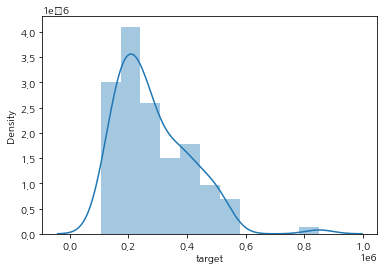

In [ ]:
target_distplot(GyeongBokGung)

- 전처리 이전

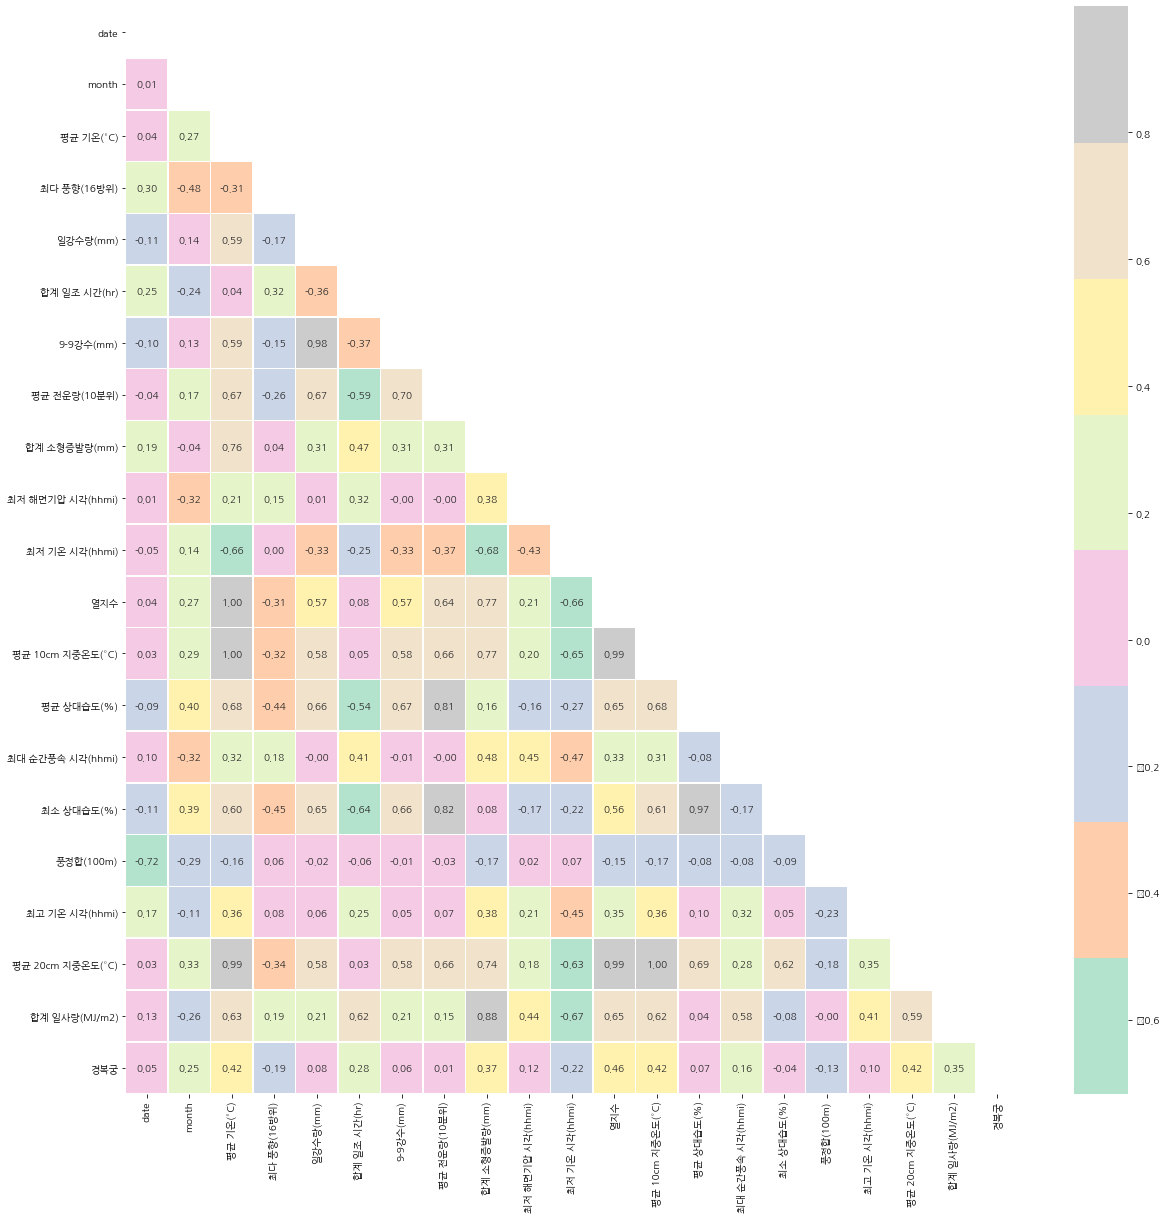

In [ ]:
heatmap(b_GyeongBokGung)

In [ ]:
statsmodel_2(b_GyeongBokGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    경복궁   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     5.974
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.61e-09
Time:                        08:23:59   Log-Likelihood:                -1373.2
No. Observations:                 108   AIC:                             2788.
Df Residuals:                      87   BIC:                             2845.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.603e+06   1.35e+07      0.193      0.847   -2.42e+07    2.94e+07
date               -10.7896     67.100     -0.161      0.873    -144.158     122.578
month            -5566.6027   4721.208     -1.179      0.242    -1.5e+04    3817.310
평균 기온(°C)        -8.064e+04    2.2e+04     -3.663      0.000   -1.24e+05   -3.69e+04
최다 풍향(16방위)          2.3389    329.953      0.007      0.994    -653.478     658.156
일강수량(mm)          -448.3025   7386.958     -0.061      0.952   -1.51e+04    1.42e+04
합계 일조 시간(hr)     -1.032e+04   2.16e+04     -0.478      0.634   -5.32e+04    3.26e+04
9-9강수(mm)         -648.2730   7675.577     -0.084      0.933   -1.59e+04    1.46e+04
평균 전운량(10분위)     -3.138e+04   2.42e+04     -1.296      0.198   -7.95e+04    1.67e+04
합계 소형증발량(mm)      -3.29e+04   2.08e+04     -1.583      0.117   -7.42e+04    8413.454
최저 해면기압 시각(hhmi)    77.0714    100.195      0.769      0.444    -122.076     276.219
최저 기온 시각(hhmi)      75.1970     96.261      0.781      0.437    -116.133     266.527
열지수                3.16e+04   6781.145      4.660      0.000    1.81e+04    4.51e+04
평균 10cm 지중온도(°C)  6.702e+04   5.27e+04      1.273      0.207   -3.76e+04    1.72e+05
평균 상대습도(%)         350.0265   6339.693      0.055      0.956   -1.23e+04     1.3e+04
최대 순간풍속 시각(hhmi)  -128.2532    120.954     -1.060      0.292    -368.662     112.156
최소 상대습도(%)       -5055.3583   6246.854     -0.809      0.421   -1.75e+04    7360.940
풍정합(100m)          -54.2364     40.479     -1.340      0.184    -134.693      26.221
최고 기온 시각(hhmi)    -152.5485    148.763     -1.025      0.308    -448.230     143.133
평균 20cm 지중온도(°C) -3.702e+04    4.7e+04     -0.787      0.433   -1.31e+05    5.65e+04
합계 일사량(MJ/m2)    -6667.4482   8503.926     -0.784      0.435   -2.36e+04    1.02e+04
==============================================================================
Omnibus:                       21.769   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.820
Skew:                           0.804   Prob(JB):                     5.03e-10
Kurtosis:                       5.633   Cond. No.                     3.14e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

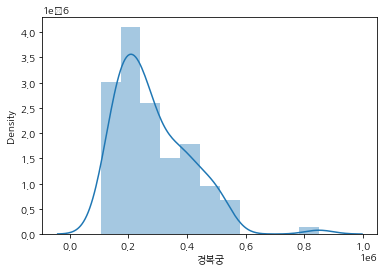

In [ ]:
target_distplot_2(b_GyeongBokGung)

NationalMuseumOfKorea
--

- 전처리 이후

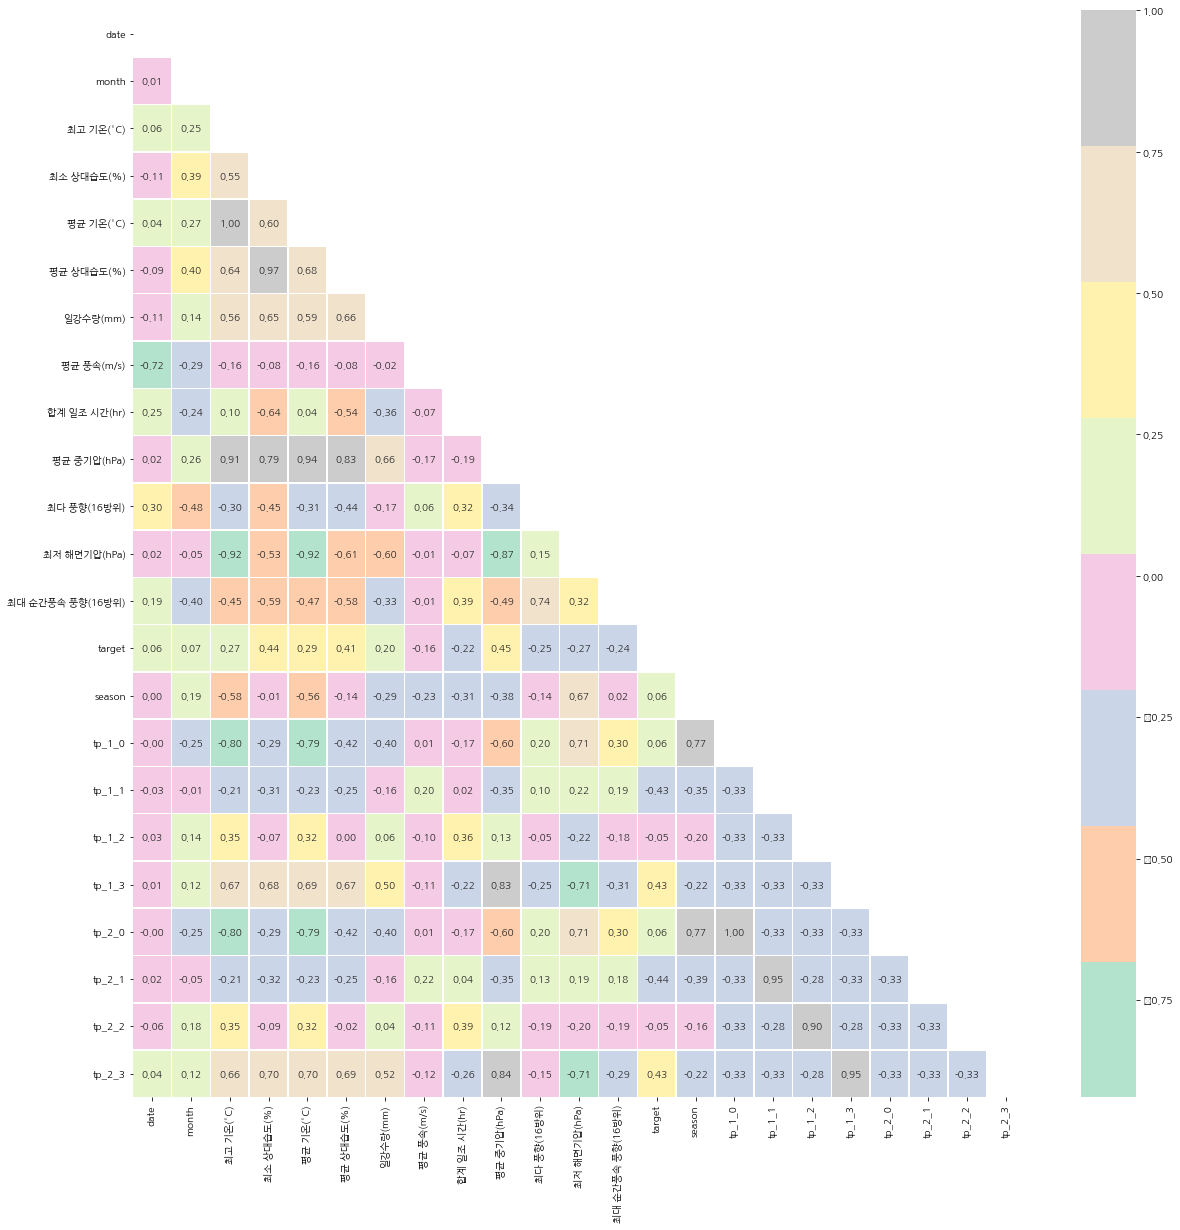

In [ ]:
heatmap(NationalMuseumOfKorea)

In [ ]:
statsmodel(NationalMuseumOfKorea)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     4.138
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           2.48e-06
Time:                        07:39:00   Log-Likelihood:                -1342.1
No. Observations:                 108   AIC:                             2724.
Df Residuals:                      88   BIC:                             2778.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.375e+06   7.58e+06     -0.841      0.403   -2.14e+07    8.69e+06
date                34.6841     52.086      0.666      0.507     -68.825     138.194
month              949.7528   2806.925      0.338      0.736   -4628.420    6527.926
최고 기온(°C)         1.223e+04   2.39e+04      0.512      0.610   -3.53e+04    5.97e+04
최소 상대습도(%)       -1027.1050   4444.983     -0.231      0.818   -9860.575    7806.365
평균 기온(°C)        -2.123e+04   2.69e+04     -0.788      0.433   -7.47e+04    3.23e+04
평균 상대습도(%)           3.5176   4032.659      0.001      0.999   -8010.544    8017.580
일강수량(mm)         -1529.4280   1380.623     -1.108      0.271   -4273.126    1214.270
평균 풍속(m/s)         753.3494   2.76e+04      0.027      0.978   -5.41e+04    5.56e+04
합계 일조 시간(hr)     -2188.5795   1.07e+04     -0.204      0.838   -2.35e+04    1.91e+04
평균 중기압(hPa)       2.235e+04   7934.123      2.816      0.006    6577.952    3.81e+04
최다 풍향(16방위)       -760.2895    341.570     -2.226      0.029   -1439.089     -81.490
최저 해면기압(hPa)      2836.1234   3971.965      0.714      0.477   -5057.322    1.07e+04
최대 순간풍속 풍향(16방위)   318.1496    410.125      0.776      0.440    -496.888    1133.188
season           -3.862e+04   1.58e+04     -2.442      0.017   -7.01e+04   -7185.350
tp_1_0           -1.549e+06    1.9e+06     -0.816      0.417   -5.32e+06    2.22e+06
tp_1_1           -1.582e+06   1.89e+06     -0.835      0.406   -5.35e+06    2.18e+06
tp_1_2           -1.586e+06    1.9e+06     -0.836      0.405   -5.35e+06    2.18e+06
tp_1_3           -1.659e+06   1.89e+06     -0.876      0.383   -5.42e+06     2.1e+06
tp_2_0           -1.549e+06    1.9e+06     -0.816      0.417   -5.32e+06    2.22e+06
tp_2_1           -1.648e+06    1.9e+06     -0.866      0.389   -5.43e+06    2.14e+06
tp_2_2           -1.606e+06   1.89e+06     -0.849      0.398   -5.36e+06    2.15e+06
tp_2_3           -1.573e+06   1.89e+06     -0.832      0.408   -5.33e+06    2.18e+06
==============================================================================
Omnibus:                        4.759   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.130
Skew:                           0.409   Prob(JB):                        0.127
Kurtosis:                       3.499   Cond. No.                     1.08e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

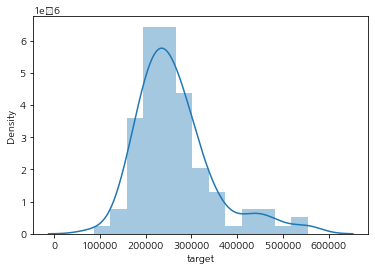

In [ ]:
target_distplot(NationalMuseumOfKorea)

- 전처리 이전

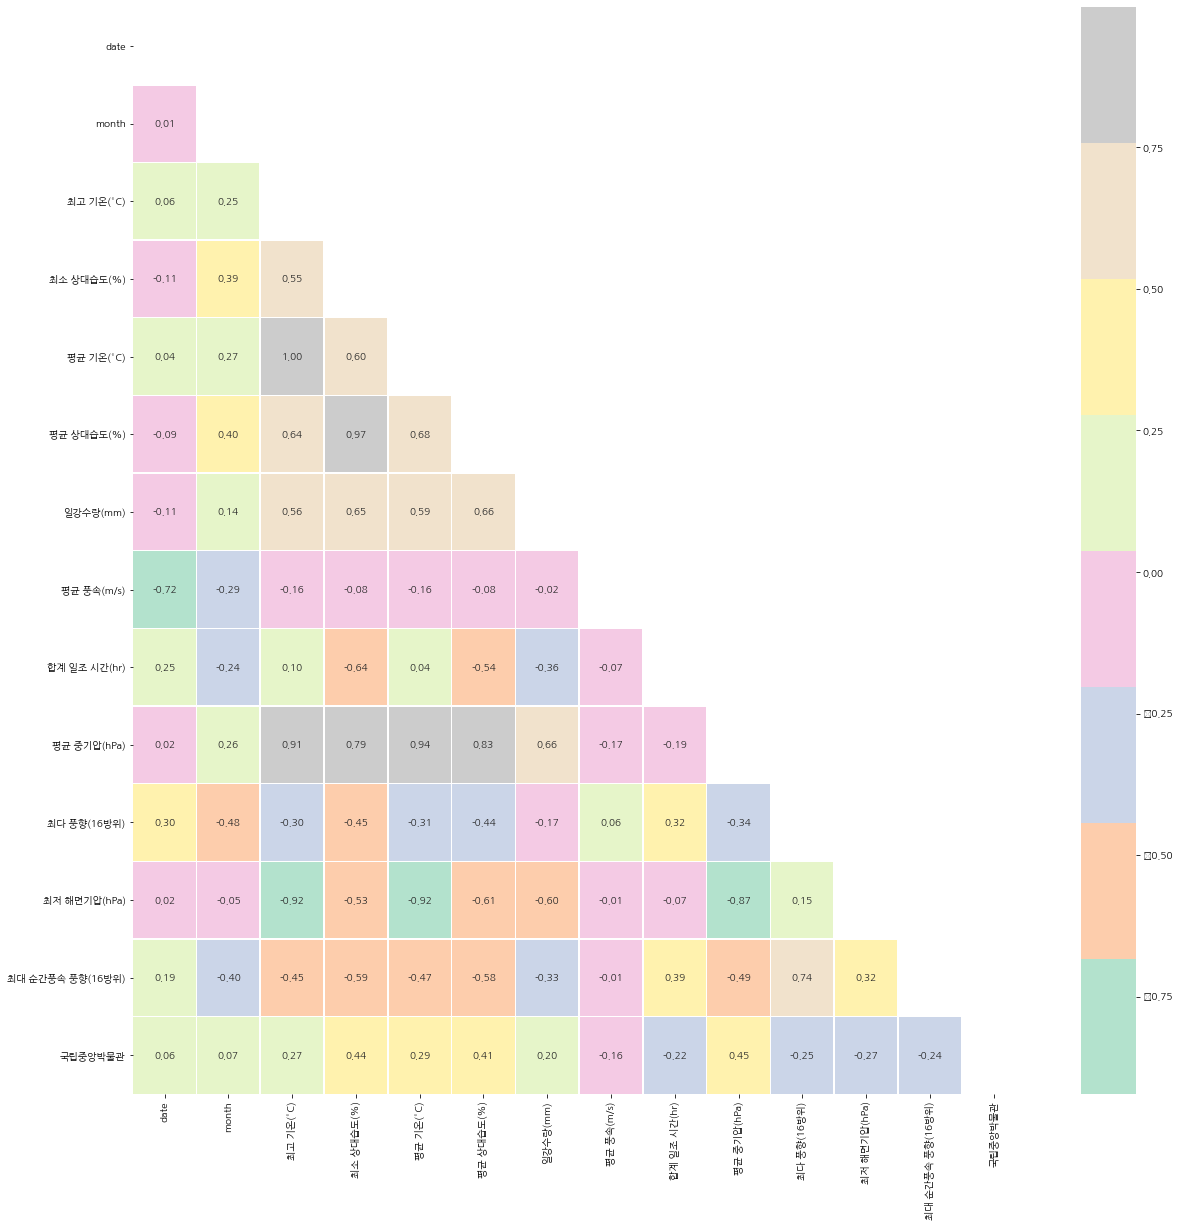

In [ ]:
heatmap(b_NationalMuseumOfKorea)

In [ ]:
statsmodel_2(b_NationalMuseumOfKorea)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                국립중앙박물관   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     4.607
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           4.59e-06
Time:                        08:48:20   Log-Likelihood:                -1350.0
No. Observations:                 108   AIC:                             2728.
Df Residuals:                      94   BIC:                             2766.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -2.32e+06   1.11e+07     -0.209      0.835   -2.43e+07    1.97e+07
date                17.3641     49.579      0.350      0.727     -81.075     115.803
month            -1368.7880   2786.593     -0.491      0.624   -6901.634    4164.059
최고 기온(°C)         1.224e+04    2.4e+04      0.510      0.611   -3.54e+04    5.99e+04
최소 상대습도(%)        -217.2361   4471.303     -0.049      0.961   -9095.112    8660.640
평균 기온(°C)        -2.462e+04   2.69e+04     -0.914      0.363   -7.81e+04    2.89e+04
평균 상대습도(%)       -1194.6763   3987.819     -0.300      0.765   -9112.585    6723.232
일강수량(mm)         -1523.7226   1409.203     -1.081      0.282   -4321.729    1274.284
평균 풍속(m/s)       -7174.2284   2.67e+04     -0.269      0.789   -6.02e+04    4.58e+04
합계 일조 시간(hr)      2800.6193   1.03e+04      0.271      0.787   -1.77e+04    2.33e+04
평균 중기압(hPa)       2.212e+04   6255.172      3.537      0.001    9702.742    3.45e+04
최다 풍향(16방위)       -432.7625    308.675     -1.402      0.164   -1045.644     180.119
최저 해면기압(hPa)      -859.3078   3451.039     -0.249      0.804   -7711.427    5992.811
최대 순간풍속 풍향(16방위)   -34.3420    405.228     -0.085      0.933    -838.931     770.247
==============================================================================
Omnibus:                        2.532   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.953
Skew:                           0.292   Prob(JB):                        0.377
Kurtosis:                       3.304   Cond. No.                     3.33e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

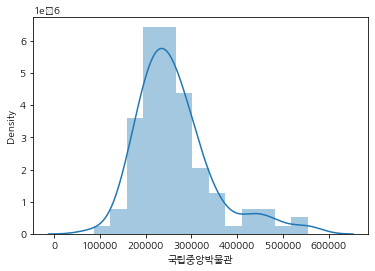

In [ ]:
target_distplot_2(b_NationalMuseumOfKorea)

NamSanGolHanOkVillage
--

- 전처리 이후

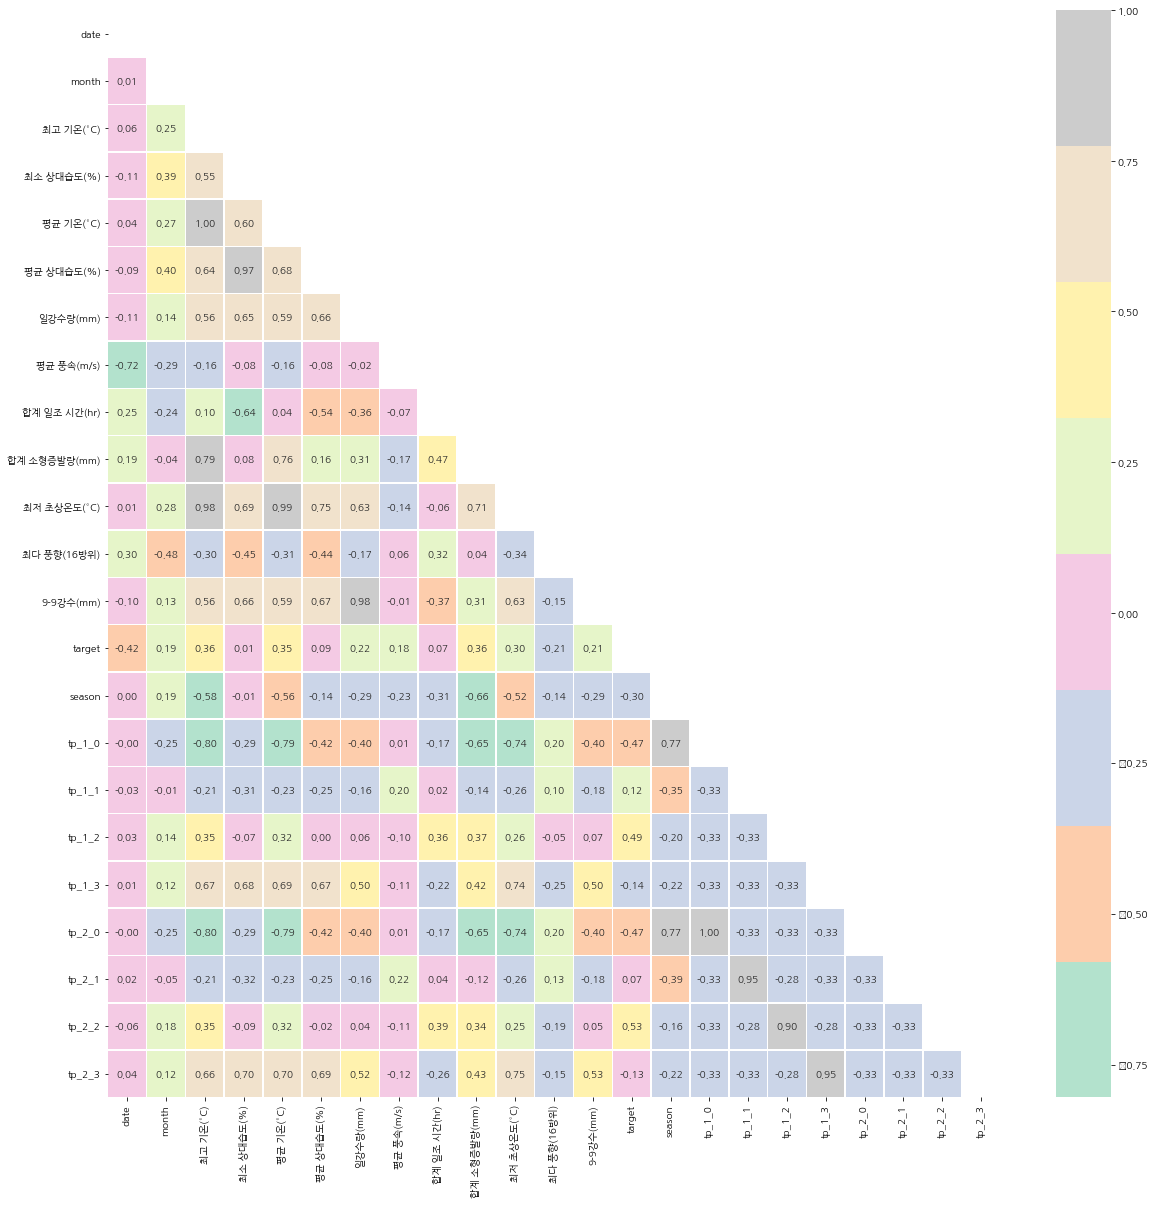

In [ ]:
heatmap(NamSanGolHanOkVillage)

In [ ]:
statsmodel(NamSanGolHanOkVillage)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     12.66
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           9.49e-18
Time:                        07:39:02   Log-Likelihood:                -1244.7
No. Observations:                 108   AIC:                             2529.
Df Residuals:                      88   BIC:                             2583.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.109e+07   2.81e+06      3.952      0.000    5.51e+06    1.67e+07
date           -82.5165     20.909     -3.947      0.000    -124.068     -40.965
month          937.2990   1087.407      0.862      0.391   -1223.694    3098.292
최고 기온(°C)    -1.167e+04   8757.529     -1.333      0.186   -2.91e+04    5730.978
최소 상대습도(%)   -5127.4249   1776.430     -2.886      0.005   -8657.706   -1597.144
평균 기온(°C)     2.057e+04   1.05e+04      1.953      0.054    -358.791    4.15e+04
평균 상대습도(%)    4244.4268   1731.354      2.452      0.016     803.725    7685.128
일강수량(mm)      1900.8799   2222.124      0.855      0.395   -2515.125    6316.885
평균 풍속(m/s)    1973.7641   1.13e+04      0.175      0.861   -2.04e+04    2.44e+04
합계 일조 시간(hr) -1.375e+04   4469.508     -3.076      0.003   -2.26e+04   -4863.841
합계 소형증발량(mm)  1.686e+04   5092.731      3.311      0.001    6741.190     2.7e+04
최저 초상온도(°C)  -6360.2226   3606.204     -1.764      0.081   -1.35e+04     806.350
최다 풍향(16방위)     80.1562    112.518      0.712      0.478    -143.450     303.762
9-9강수(mm)    -1436.0872   2308.661     -0.622      0.536   -6024.066    3151.892
season        1.207e+04   5976.152      2.020      0.046     197.930     2.4e+04
tp_1_0        2.772e+06   7.04e+05      3.939      0.000    1.37e+06    4.17e+06
tp_1_1        2.792e+06   6.99e+05      3.992      0.000     1.4e+06    4.18e+06
tp_1_2        2.779e+06   7.02e+05      3.959      0.000    1.38e+06    4.17e+06
tp_1_3        2.744e+06   7.01e+05      3.916      0.000    1.35e+06    4.14e+06
tp_2_0        2.772e+06   7.04e+05      3.939      0.000    1.37e+06    4.17e+06
tp_2_1        2.773e+06   7.05e+05      3.931      0.000    1.37e+06    4.17e+06
tp_2_2        2.789e+06   6.98e+05      3.996      0.000     1.4e+06    4.18e+06
tp_2_3        2.754e+06   6.99e+05      3.941      0.000    1.37e+06    4.14e+06
==============================================================================
Omnibus:                        2.329   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                2.357
Skew:                           0.327   Prob(JB):                        0.308
Kurtosis:                       2.691   Cond. No.                     1.17e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.19e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

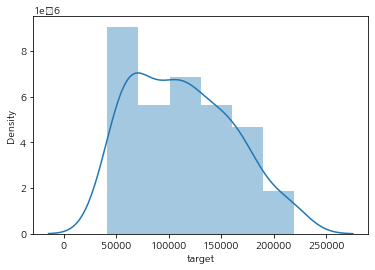

In [ ]:
target_distplot(NamSanGolHanOkVillage)

- 전처리 이전

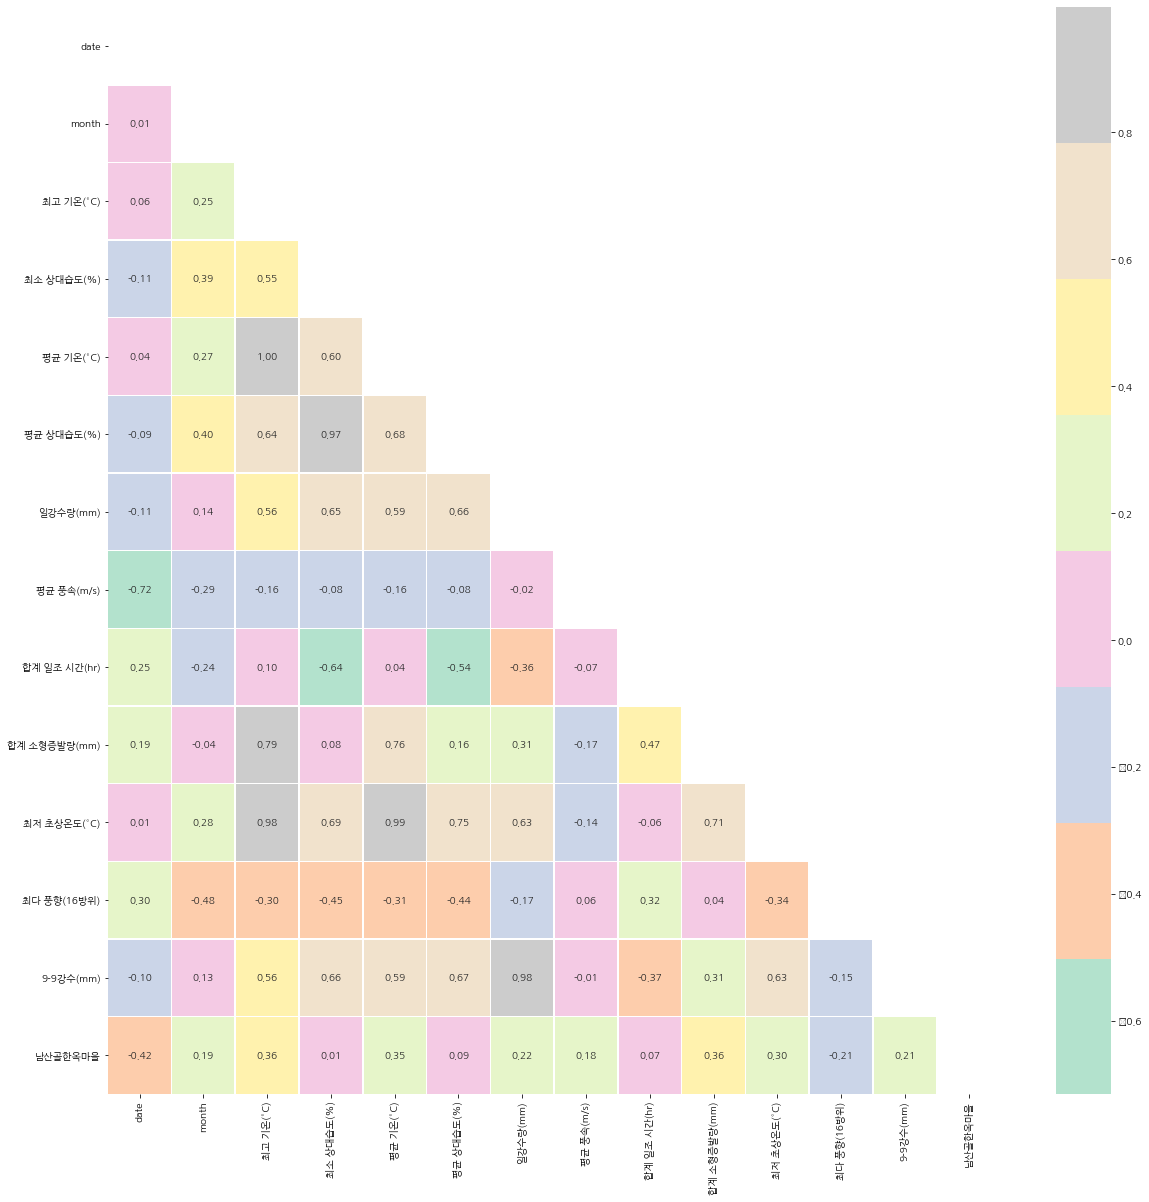

In [ ]:
heatmap(b_NamSanGolHanOkVillage)

In [ ]:
statsmodel_2(b_NamSanGolHanOkVillage)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     11.65
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.53e-14
Time:                        08:57:20   Log-Likelihood:                -1264.0
No. Observations:                 108   AIC:                             2556.
Df Residuals:                      94   BIC:                             2594.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.981e+07   4.44e+06      4.465      0.000     1.1e+07    2.86e+07
date           -98.3731     22.032     -4.465      0.000    -142.119     -54.628
month         2975.4547   1107.392      2.687      0.009     776.702    5174.208
최고 기온(°C)    -5340.4640   9628.434     -0.555      0.580   -2.45e+04    1.38e+04
최소 상대습도(%)   -5570.9830   1922.317     -2.898      0.005   -9387.789   -1754.177
평균 기온(°C)     2.071e+04    1.2e+04      1.727      0.087   -3095.832    4.45e+04
평균 상대습도(%)    4703.9228   1893.131      2.485      0.015     945.067    8462.779
일강수량(mm)      -360.3460   2497.942     -0.144      0.886   -5320.068    4599.376
평균 풍속(m/s)   -4246.5774   1.16e+04     -0.367      0.714   -2.72e+04    1.87e+04
합계 일조 시간(hr) -1.456e+04   4578.129     -3.181      0.002   -2.37e+04   -5470.837
합계 소형증발량(mm)  1.403e+04   5433.631      2.582      0.011    3239.098    2.48e+04
최저 초상온도(°C)   -1.44e+04   3851.134     -3.739      0.000    -2.2e+04   -6753.151
최다 풍향(16방위)    -10.5613    111.414     -0.095      0.925    -231.776     210.654
9-9강수(mm)     1179.1507   2587.465      0.456      0.650   -3958.322    6316.623
==============================================================================
Omnibus:                        3.978   Durbin-Watson:                   1.236
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.758
Skew:                           0.457   Prob(JB):                        0.153
Kurtosis:                       2.984   Cond. No.                     2.96e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

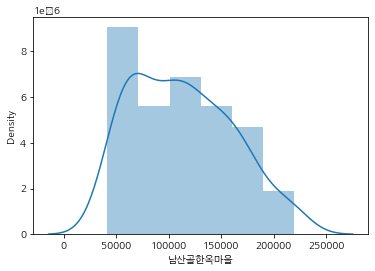

In [ ]:
target_distplot_2(b_NamSanGolHanOkVillage)

DuckSooGung
--

- 전처리 이후

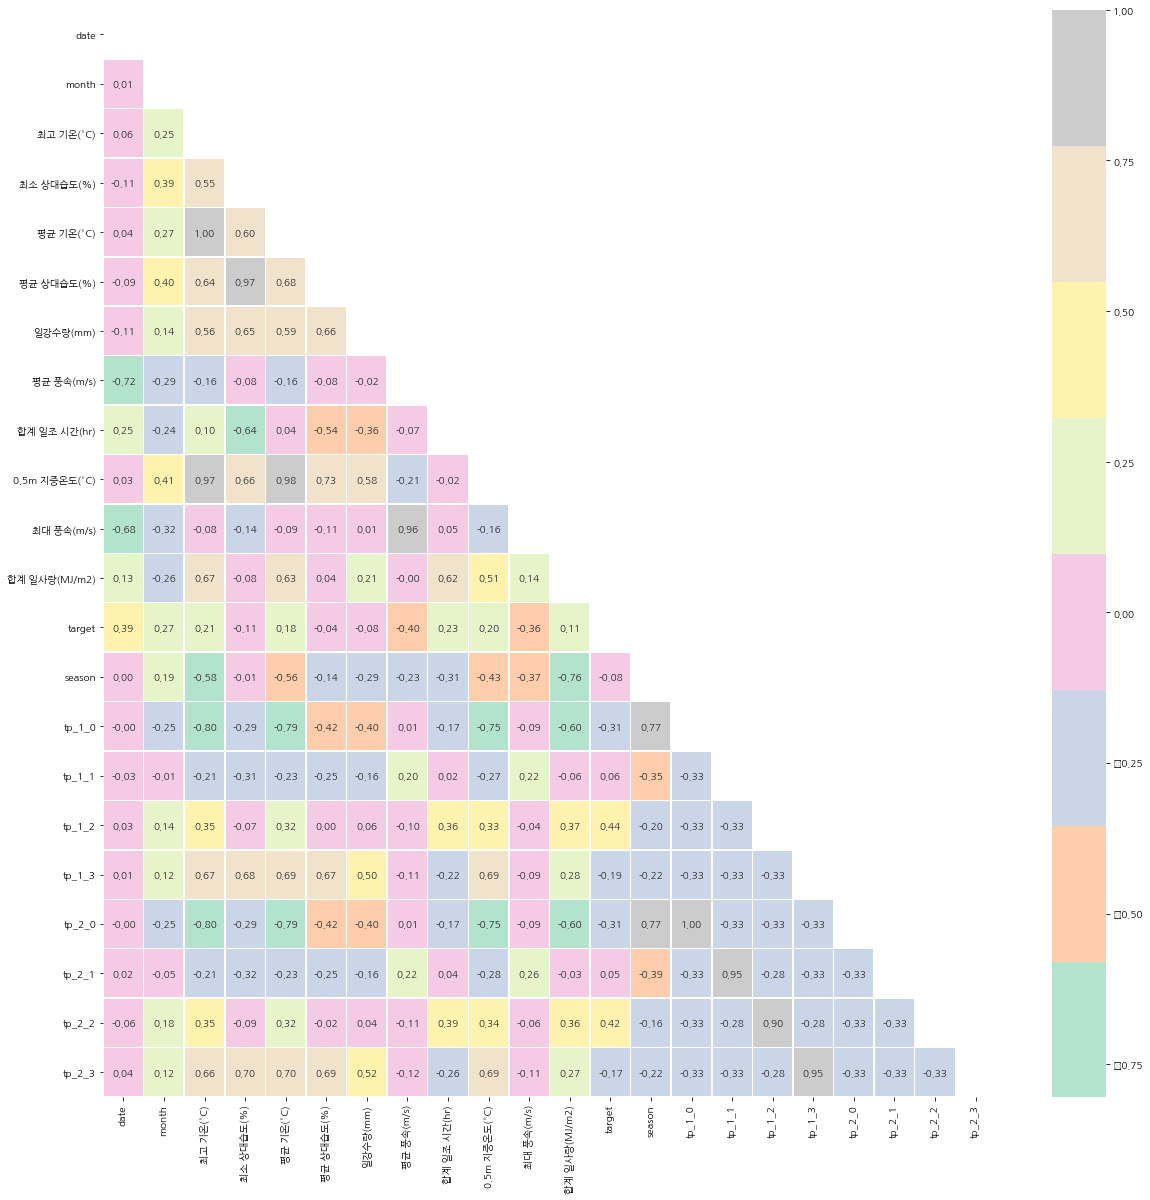

In [ ]:
heatmap(DuckSooGung)

In [ ]:
statsmodel(DuckSooGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     5.261
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           4.80e-08
Time:                        07:39:04   Log-Likelihood:                -1300.6
No. Observations:                 108   AIC:                             2639.
Df Residuals:                      89   BIC:                             2690.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.226e+06   4.47e+06     -1.840      0.069   -1.71e+07    6.55e+05
date             61.9055     33.213      1.864      0.066      -4.088     127.900
month           888.8257   2295.715      0.387      0.700   -3672.711    5450.362
최고 기온(°C)      2.156e+04   1.41e+04      1.527      0.130   -6496.134    4.96e+04
최소 상대습도(%)    -2048.4701   3164.106     -0.647      0.519   -8335.481    4238.541
평균 기온(°C)     -1.992e+04   1.57e+04     -1.265      0.209   -5.12e+04    1.14e+04
평균 상대습도(%)      919.3706   2823.817      0.326      0.746   -4691.493    6530.235
일강수량(mm)       -564.6486    895.659     -0.630      0.530   -2344.305    1215.007
평균 풍속(m/s)    -7984.3858   4.82e+04     -0.166      0.869   -1.04e+05    8.78e+04
합계 일조 시간(hr)  -6583.8599   8497.491     -0.775      0.441   -2.35e+04    1.03e+04
0.5m 지중온도(°C) -1168.3106   5662.068     -0.206      0.837   -1.24e+04    1.01e+04
최대 풍속(m/s)    -3242.3352   2.97e+04     -0.109      0.913   -6.22e+04    5.57e+04
합계 일사량(MJ/m2) -4546.4066   3587.657     -1.267      0.208   -1.17e+04    2582.191
season         8653.2707   1.37e+04      0.632      0.529   -1.85e+04    3.59e+04
tp_1_0        -2.083e+06   1.12e+06     -1.856      0.067   -4.31e+06    1.47e+05
tp_1_1        -2.041e+06   1.11e+06     -1.832      0.070   -4.26e+06    1.73e+05
tp_1_2        -2.027e+06   1.12e+06     -1.809      0.074   -4.25e+06    1.99e+05
tp_1_3        -2.075e+06   1.11e+06     -1.862      0.066   -4.29e+06    1.39e+05
tp_2_0        -2.083e+06   1.12e+06     -1.856      0.067   -4.31e+06    1.47e+05
tp_2_1        -2.072e+06   1.12e+06     -1.848      0.068    -4.3e+06    1.56e+05
tp_2_2        -2.038e+06   1.11e+06     -1.838      0.069   -4.24e+06    1.65e+05
tp_2_3        -2.032e+06   1.12e+06     -1.818      0.072   -4.25e+06    1.89e+05
==============================================================================
Omnibus:                       88.663   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              913.563
Skew:                           2.597   Prob(JB):                    4.19e-199
Kurtosis:                      16.268   Cond. No.                     8.44e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.16e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

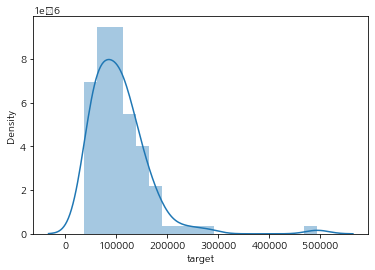

In [ ]:
target_distplot(DuckSooGung)

- 전처리 이전

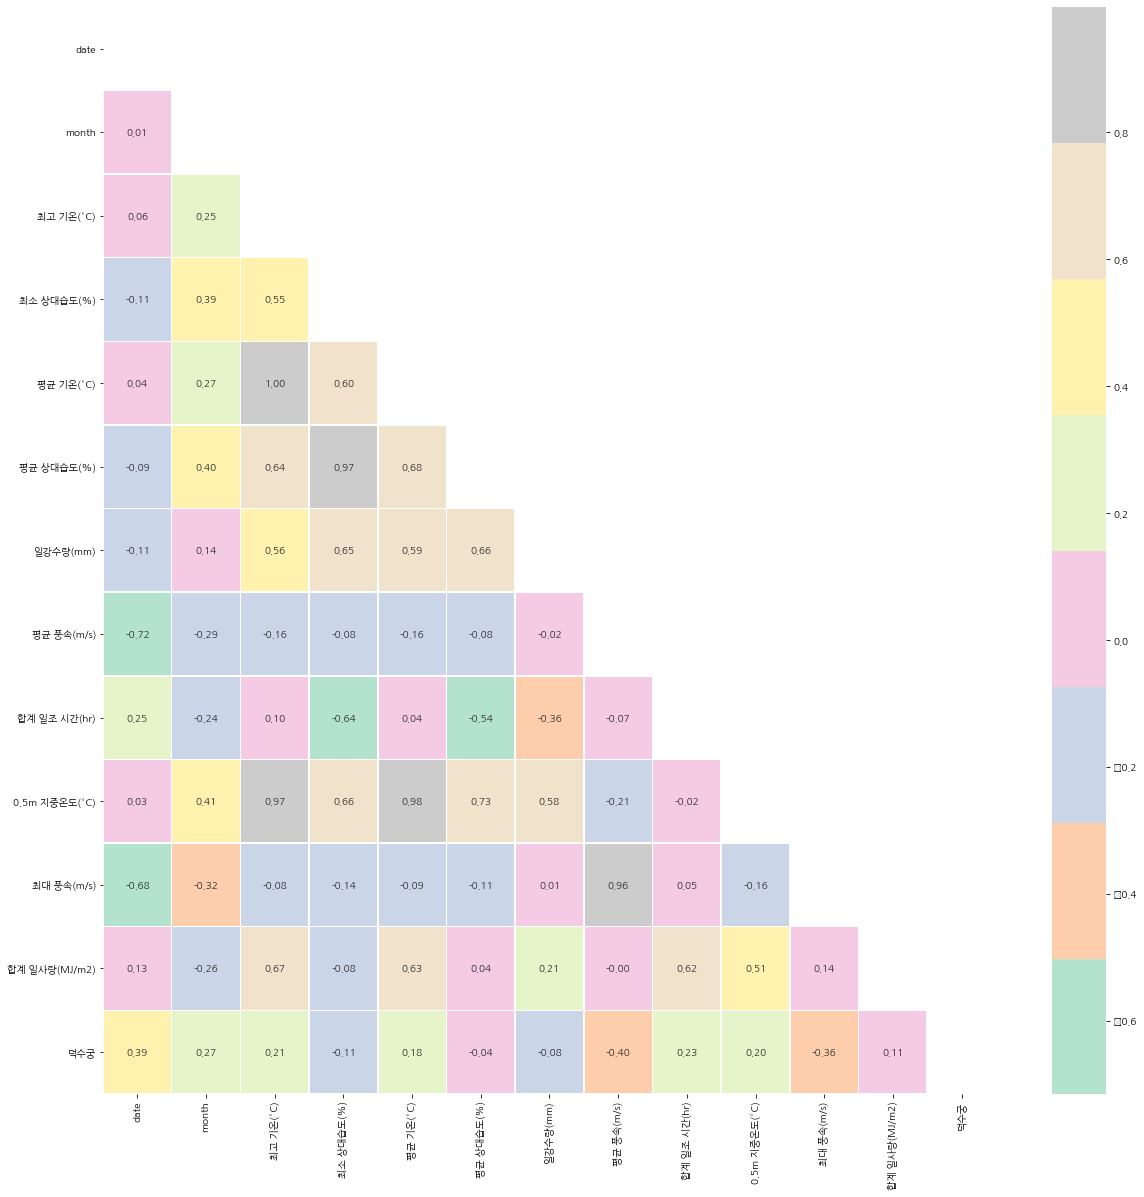

In [ ]:
heatmap(b_DuckSooGung)

In [ ]:
statsmodel_2(b_DuckSooGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    덕수궁   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     6.262
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           5.00e-08
Time:                        08:58:47   Log-Likelihood:                -1308.3
No. Observations:                 108   AIC:                             2643.
Df Residuals:                      95   BIC:                             2677.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.608e+06   6.04e+06     -1.261      0.211   -1.96e+07    4.37e+06
date             38.0022     29.917      1.270      0.207     -21.391      97.395
month           940.9032   2212.567      0.425      0.672   -3451.597    5333.403
최고 기온(°C)      4.192e+04   1.29e+04      3.248      0.002    1.63e+04    6.75e+04
최소 상대습도(%)    -4511.4827   3031.497     -1.488      0.140   -1.05e+04    1506.800
평균 기온(°C)     -4.322e+04   1.43e+04     -3.033      0.003   -7.15e+04   -1.49e+04
평균 상대습도(%)     2725.8324   2767.254      0.985      0.327   -2767.861    8219.526
일강수량(mm)       -325.2604    927.906     -0.351      0.727   -2167.386    1516.865
평균 풍속(m/s)     2.632e+04   4.69e+04      0.561      0.576   -6.68e+04    1.19e+05
합계 일조 시간(hr)  -1.084e+04   8270.554     -1.311      0.193   -2.73e+04    5577.433
0.5m 지중온도(°C)  5027.1808   4717.347      1.066      0.289   -4337.937    1.44e+04
최대 풍속(m/s)    -2.666e+04   2.69e+04     -0.989      0.325   -8.02e+04    2.68e+04
합계 일사량(MJ/m2) -4194.1745   3313.497     -1.266      0.209   -1.08e+04    2383.949
==============================================================================
Omnibus:                       82.069   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.500
Skew:                           2.417   Prob(JB):                    3.47e-152
Kurtosis:                      14.473   Cond. No.                     2.69e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

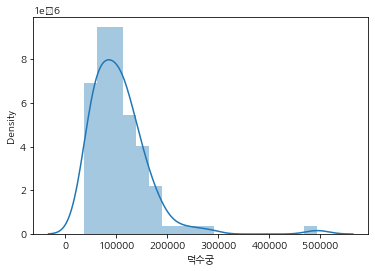

In [ ]:
target_distplot_2(b_DuckSooGung)

SeoDaeMunNaturalHistoryMuseum
--

- 전처리 이전

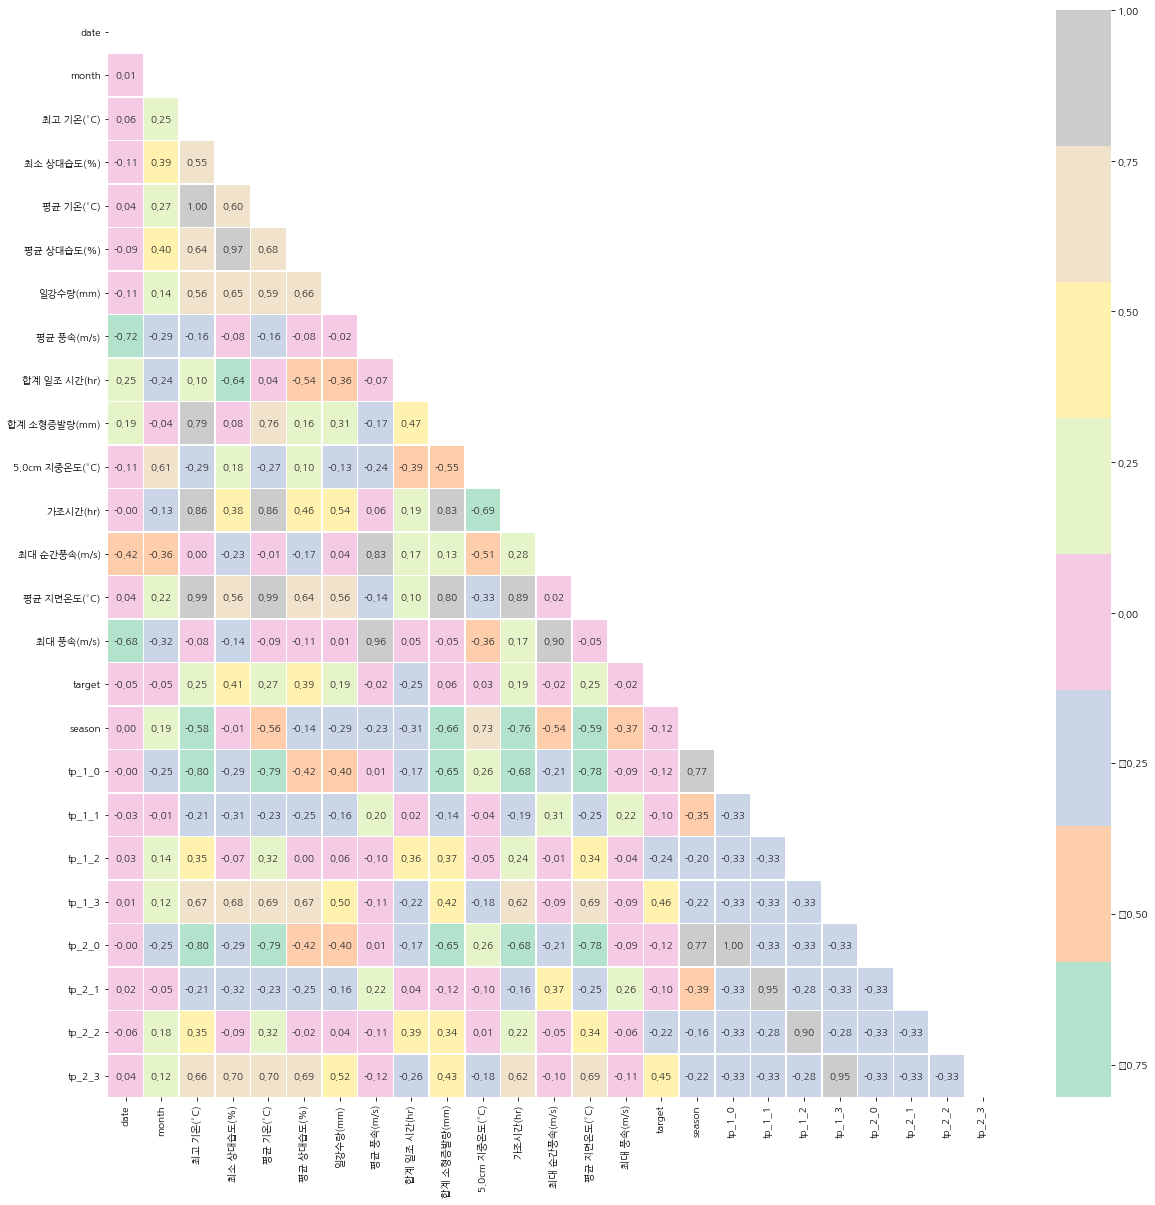

In [ ]:
heatmap(SeoDaeMunNaturalHistoryMuseum)

In [ ]:
statsmodel(SeoDaeMunNaturalHistoryMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     4.099
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.67e-06
Time:                        07:39:06   Log-Likelihood:                -1095.9
No. Observations:                 108   AIC:                             2236.
Df Residuals:                      86   BIC:                             2295.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            9.74e+05   8.99e+05      1.084      0.281   -8.12e+05    2.76e+06
date              -6.8480      6.608     -1.036      0.303     -19.985       6.289
month          -1315.7340    317.528     -4.144      0.000   -1946.959    -684.509
최고 기온(°C)       -806.2989   2259.506     -0.357      0.722   -5298.047    3685.449
최소 상대습도(%)       481.8665    486.307      0.991      0.325    -484.880    1448.614
평균 기온(°C)       1954.8156   2478.888      0.789      0.433   -2973.051    6882.682
평균 상대습도(%)       -35.1249    453.031     -0.078      0.938    -935.722     865.472
일강수량(mm)        -215.9316    152.036     -1.420      0.159    -518.169      86.306
평균 풍속(m/s)     -7499.8138   7400.892     -1.013      0.314   -2.22e+04    7212.673
합계 일조 시간(hr)     707.7307   1192.148      0.594      0.554   -1662.180    3077.642
합계 소형증발량(mm)    -208.9353   1464.401     -0.143      0.887   -3120.069    2702.198
5.0cm 지중온도(°C)  1402.2148   1778.102      0.789      0.433   -2132.535    4936.964
가조시간(hr)       -6474.2169   3347.329     -1.934      0.056   -1.31e+04     180.054
최대 순간풍속(m/s)    4029.8859   2691.913      1.497      0.138   -1321.459    9381.231
평균 지면온도(°C)     -357.6154   1116.611     -0.320      0.750   -2577.365    1862.134
최대 풍속(m/s)     -1367.9519   5689.322     -0.240      0.811   -1.27e+04    9942.046
season         -8622.9536   2195.844     -3.927      0.000    -1.3e+04   -4257.760
tp_1_0           2.47e+05   2.25e+05      1.099      0.275      -2e+05    6.94e+05
tp_1_1          2.409e+05   2.25e+05      1.073      0.286   -2.05e+05    6.87e+05
tp_1_2          2.392e+05   2.25e+05      1.062      0.291   -2.09e+05    6.87e+05
tp_1_3          2.469e+05   2.24e+05      1.101      0.274   -1.99e+05    6.93e+05
tp_2_0           2.47e+05   2.25e+05      1.099      0.275      -2e+05    6.94e+05
tp_2_1          2.395e+05   2.25e+05      1.065      0.290   -2.07e+05    6.86e+05
tp_2_2          2.428e+05   2.24e+05      1.085      0.281   -2.02e+05    6.88e+05
tp_2_3          2.447e+05   2.25e+05      1.086      0.281   -2.03e+05    6.93e+05
==============================================================================
Omnibus:                       14.536   Durbin-Watson:                   2.435
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.322
Skew:                          -0.481   Prob(JB):                     2.60e-07
Kurtosis:                       5.411   Cond. No.                     1.19e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.12e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

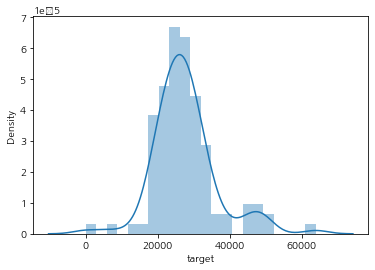

In [ ]:
target_distplot(SeoDaeMunNaturalHistoryMuseum)

- 전처리 이전

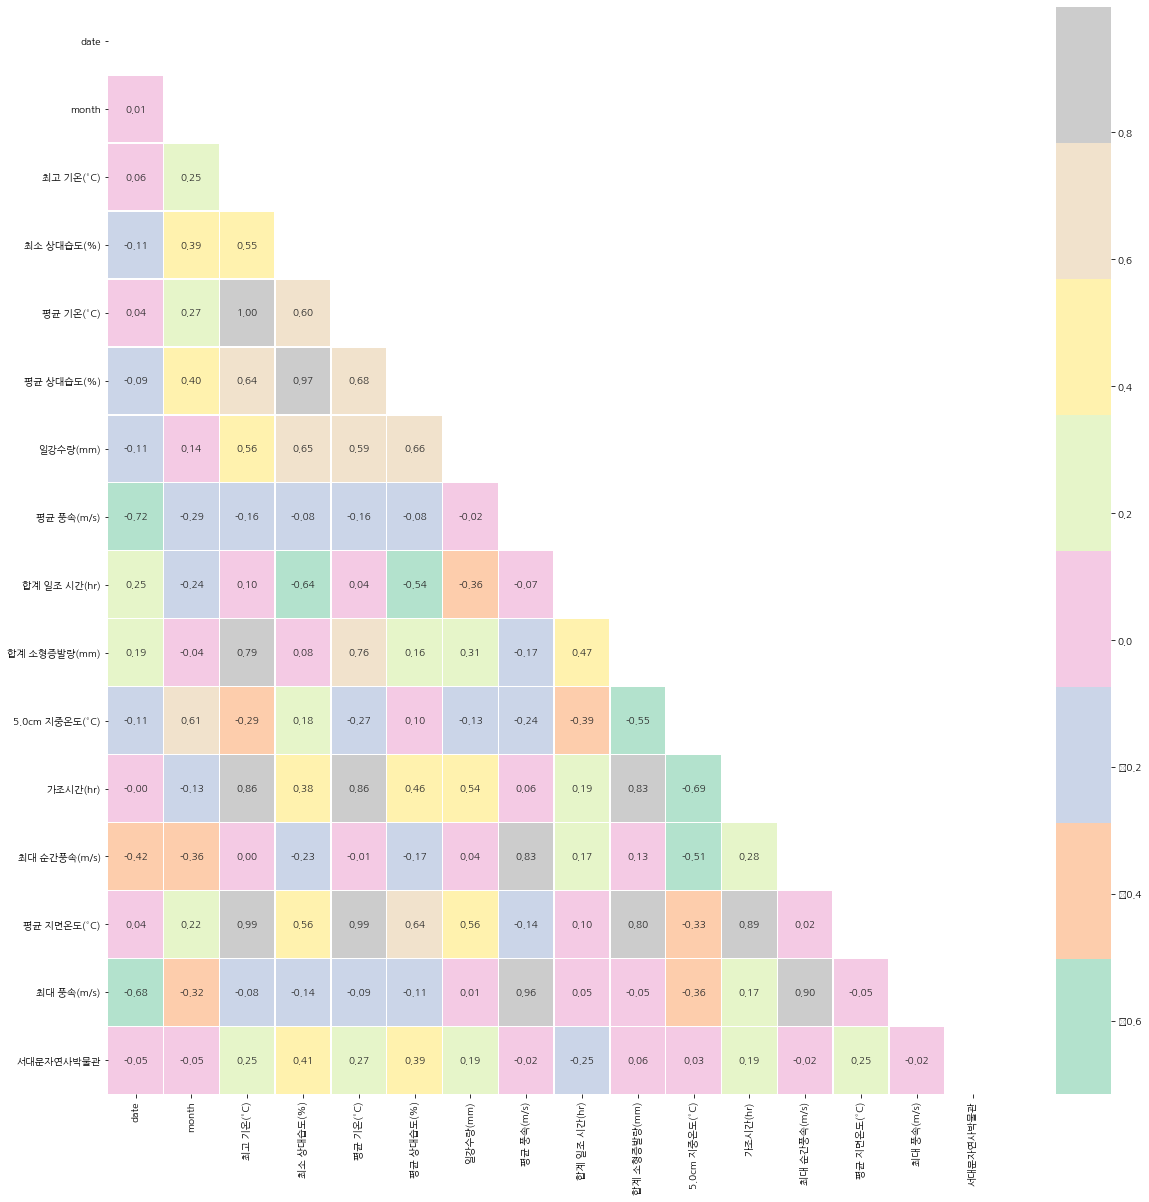

In [ ]:
heatmap(b_SeoDaeMunNaturalHistoryMuseum)

In [ ]:
statsmodel_2(b_SeoDaeMunNaturalHistoryMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문자연사박물관   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     3.406
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           0.000138
Time:                        09:00:31   Log-Likelihood:                -1109.5
No. Observations:                 108   AIC:                             2251.
Df Residuals:                      92   BIC:                             2294.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.191e+06   1.38e+06      0.864      0.390   -1.55e+06    3.93e+06
date              -5.5328      6.746     -0.820      0.414     -18.930       7.865
month          -1260.6115    340.667     -3.700      0.000   -1937.205    -584.018
최고 기온(°C)      -3369.6516   2208.739     -1.526      0.131   -7756.399    1017.095
최소 상대습도(%)       678.6093    516.149      1.315      0.192    -346.506    1703.725
평균 기온(°C)       5115.3215   2527.279      2.024      0.046      95.928    1.01e+04
평균 상대습도(%)      -197.5412    478.457     -0.413      0.681   -1147.798     752.715
일강수량(mm)        -285.1257    165.517     -1.723      0.088    -613.857      43.606
평균 풍속(m/s)     -1.337e+04   7880.537     -1.697      0.093    -2.9e+04    2276.719
합계 일조 시간(hr)    1200.4067   1246.328      0.963      0.338   -1274.908    3675.721
합계 소형증발량(mm)    -477.2601   1522.715     -0.313      0.755   -3501.504    2546.984
5.0cm 지중온도(°C)  -982.1894   1691.540     -0.581      0.563   -4341.734    2377.355
가조시간(hr)       -4757.8496   3509.253     -1.356      0.178   -1.17e+04    2211.830
최대 순간풍속(m/s)    4960.6327   2803.210      1.770      0.080    -606.784    1.05e+04
평균 지면온도(°C)     -842.3010   1180.691     -0.713      0.477   -3187.256    1502.653
최대 풍속(m/s)      2177.5270   6086.476      0.358      0.721   -9910.739    1.43e+04
==============================================================================
Omnibus:                       13.213   Durbin-Watson:                   2.579
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               38.320
Skew:                          -0.224   Prob(JB):                     4.78e-09
Kurtosis:                       5.883   Cond. No.                     3.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

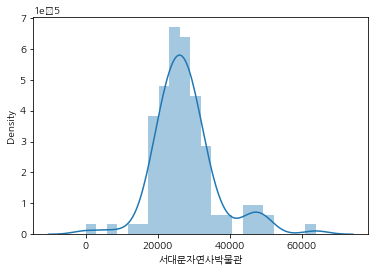

In [ ]:
target_distplot_2(b_SeoDaeMunNaturalHistoryMuseum)

SeoulMuseumOfArt
--

- 전처리 이후

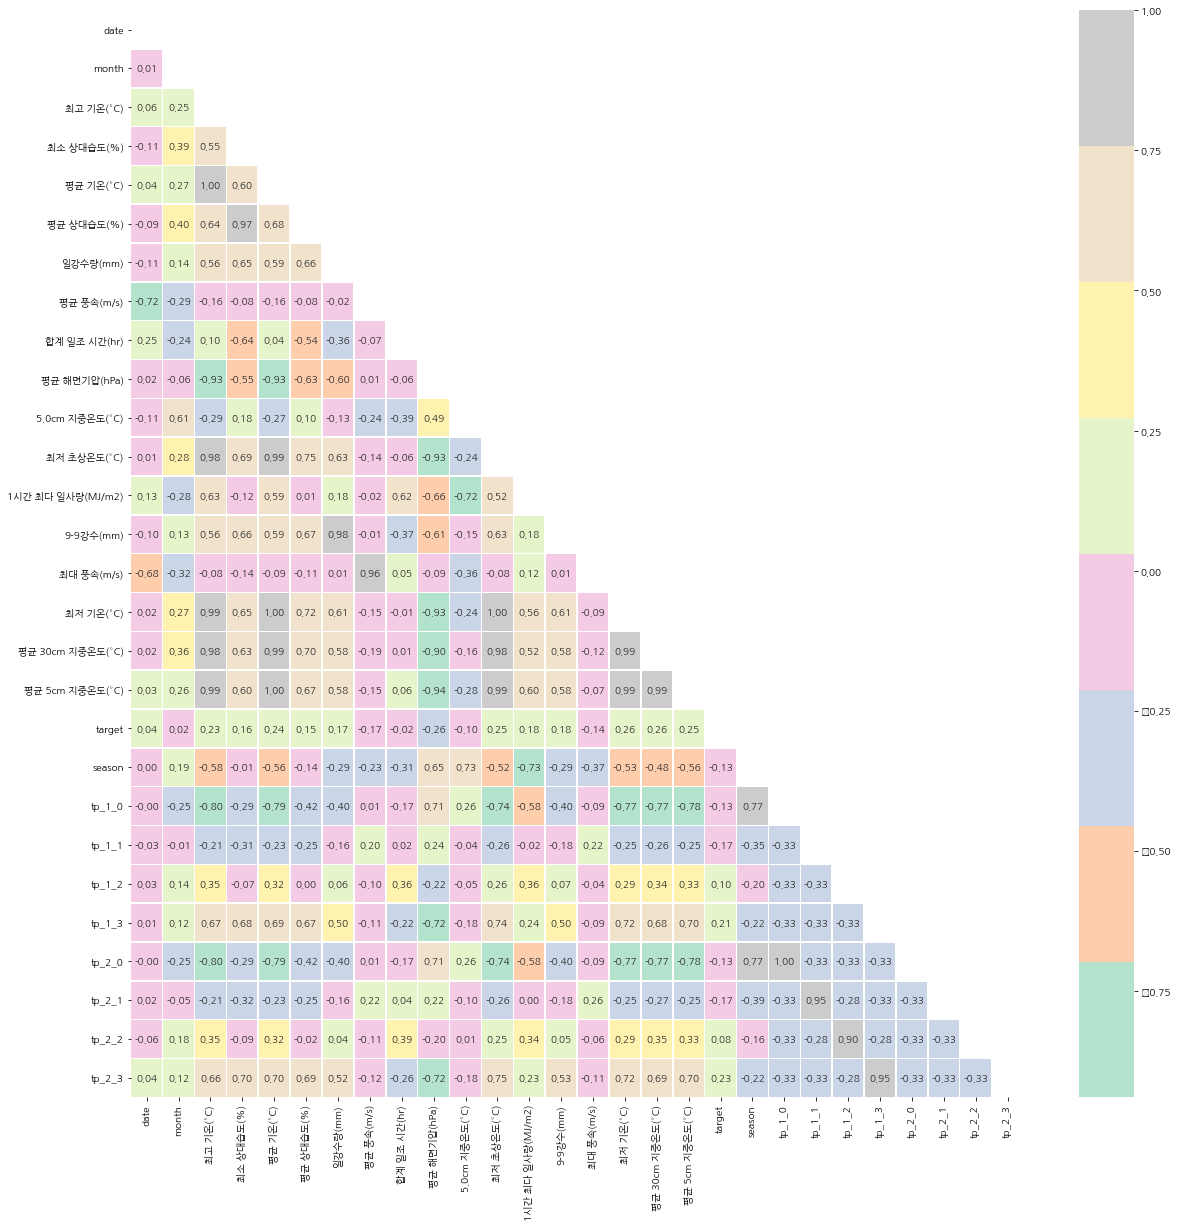

In [ ]:
heatmap(SeoulMuseumOfArt)

In [ ]:
statsmodel(SeoulMuseumOfArt)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     2.179
Date:                Sat, 17 Jul 2021   Prob (F-statistic):            0.00496
Time:                        07:39:09   Log-Likelihood:                -1320.2
No. Observations:                 108   AIC:                             2690.
Df Residuals:                      83   BIC:                             2758.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5.185e+06   7.07e+06     -0.733      0.466   -1.93e+07    8.88e+06
date                 17.7445     47.279      0.375      0.708     -76.292     111.781
month              -848.1953   3003.693     -0.282      0.778   -6822.421    5126.030
최고 기온(°C)         -6.999e+04   2.67e+04     -2.617      0.011   -1.23e+05   -1.68e+04
최소 상대습도(%)        -4123.9762   4112.754     -1.003      0.319   -1.23e+04    4056.126
평균 기온(°C)          4.032e+04   5.25e+04      0.768      0.445   -6.41e+04    1.45e+05
평균 상대습도(%)         1455.0090   3874.623      0.376      0.708   -6251.460    9161.478
일강수량(mm)            777.5503   4919.461      0.158      0.875   -9007.060    1.06e+04
평균 풍속(m/s)        -7.384e+04   6.63e+04     -1.114      0.268   -2.06e+05     5.8e+04
합계 일조 시간(hr)       1.209e+04   1.02e+04      1.191      0.237   -8094.833    3.23e+04
평균 해면기압(hPa)       4962.8888   4356.080      1.139      0.258   -3701.179    1.36e+04
5.0cm 지중온도(°C)    -2.022e+04   1.11e+04     -1.824      0.072   -4.23e+04    1823.435
최저 초상온도(°C)       -6976.8218   7908.443     -0.882      0.380   -2.27e+04    8752.753
1시간 최다 일사량(MJ/m2)  1.148e+04   3.72e+04      0.308      0.759   -6.26e+04    8.55e+04
9-9강수(mm)          -730.3806   5085.845     -0.144      0.886   -1.08e+04    9385.161
최대 풍속(m/s)         2.972e+04   4.22e+04      0.704      0.483   -5.43e+04    1.14e+05
최저 기온(°C)          3.872e+04   3.21e+04      1.205      0.231   -2.52e+04    1.03e+05
평균 30cm 지중온도(°C)   2.017e+04   1.27e+04      1.583      0.117   -5175.151    4.55e+04
평균 5cm 지중온도(°C)   -1.907e+04   1.61e+04     -1.182      0.240   -5.12e+04     1.3e+04
season            -1.012e+04    1.9e+04     -0.532      0.596    -4.8e+04    2.77e+04
tp_1_0            -1.321e+06   1.77e+06     -0.745      0.458   -4.85e+06    2.21e+06
tp_1_1            -1.303e+06   1.77e+06     -0.738      0.463   -4.82e+06    2.21e+06
tp_1_2            -1.276e+06   1.77e+06     -0.720      0.473    -4.8e+06    2.25e+06
tp_1_3            -1.284e+06   1.76e+06     -0.728      0.468   -4.79e+06    2.22e+06
tp_2_0            -1.321e+06   1.77e+06     -0.745      0.458   -4.85e+06    2.21e+06
tp_2_1            -1.314e+06   1.77e+06     -0.741      0.461   -4.84e+06    2.21e+06
tp_2_2            -1.275e+06   1.76e+06     -0.725      0.470   -4.77e+06    2.22e+06
tp_2_3            -1.274e+06   1.77e+06     -0.720      0.474   -4.79e+06    2.25e+06
==============================================================================
Omnibus:                       18.270   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.879
Skew:                           0.906   Prob(JB):                     1.08e-05
Kurtosis:                       4.342   Cond. No.                     1.00e+16
======================

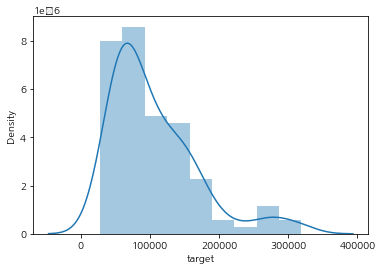

In [ ]:
target_distplot(SeoulMuseumOfArt)

- 전처리 이전

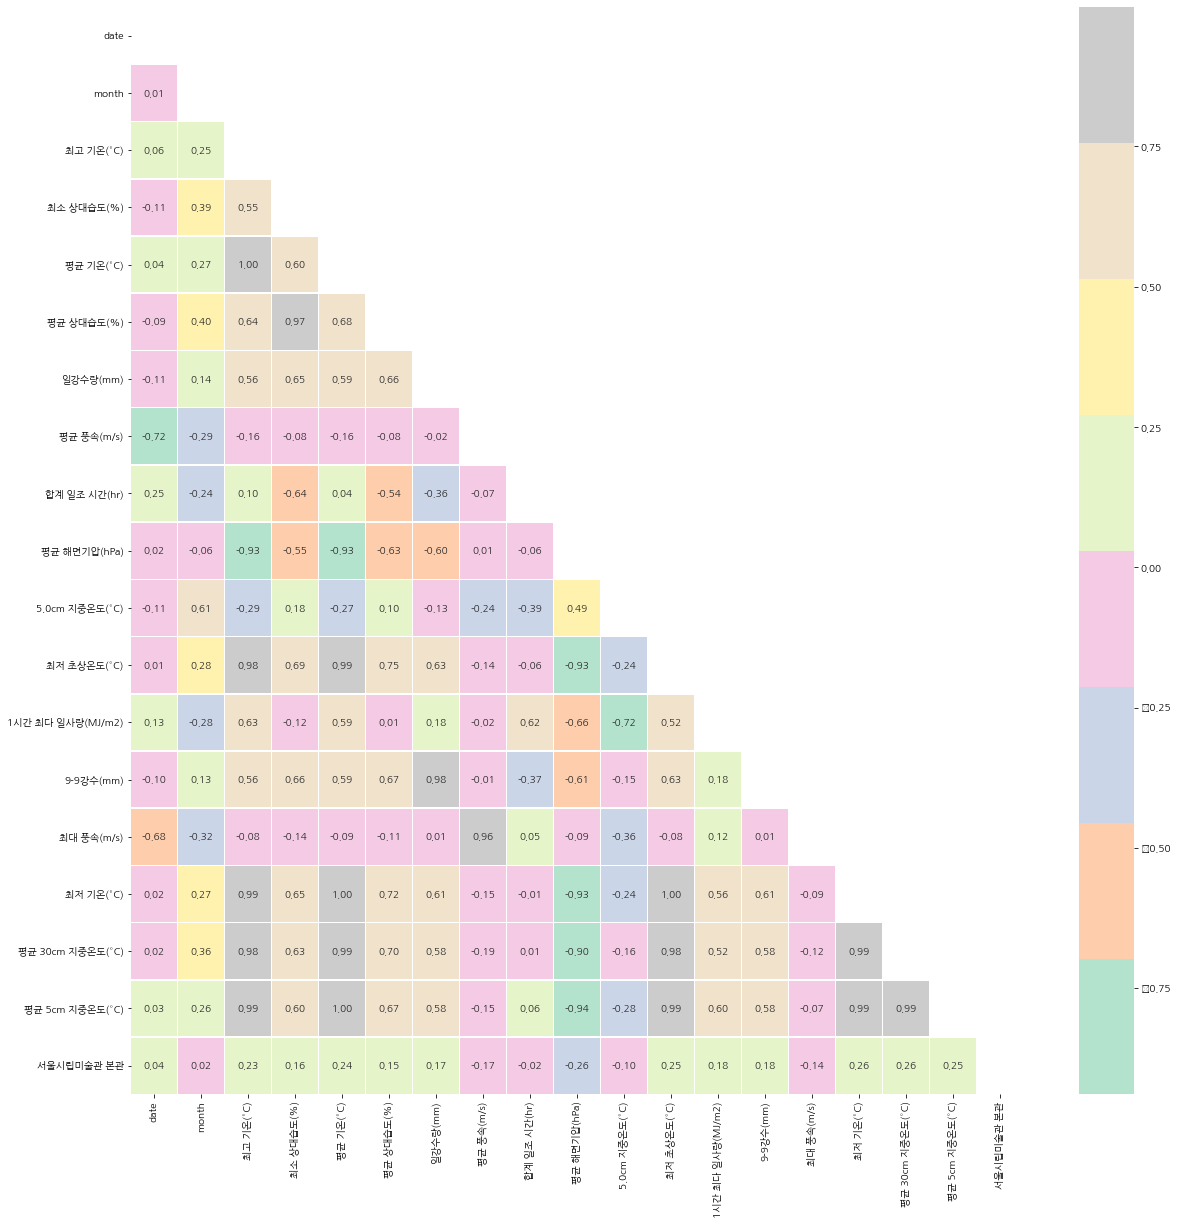

In [ ]:
heatmap(b_SeoulMuseumOfArt)

In [ ]:
statsmodel_2(b_SeoulMuseumOfArt)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             서울시립미술관 본관   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     2.662
Date:                Sat, 17 Jul 2021   Prob (F-statistic):            0.00126
Time:                        09:02:09   Log-Likelihood:                -1323.4
No. Observations:                 108   AIC:                             2685.
Df Residuals:                      89   BIC:                             2736.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.878e+06   9.64e+06     -0.402      0.689    -2.3e+07    1.53e+07
date                 -3.7160     41.593     -0.089      0.929     -86.361      78.929
month             -1681.5529   2827.909     -0.595      0.554   -7300.547    3937.442
최고 기온(°C)         -6.803e+04   2.48e+04     -2.748      0.007   -1.17e+05   -1.88e+04
최소 상대습도(%)        -5169.1737   3940.428     -1.312      0.193    -1.3e+04    2660.372
평균 기온(°C)          5.284e+04   4.79e+04      1.104      0.273   -4.23e+04    1.48e+05
평균 상대습도(%)         2932.4756   3637.095      0.806      0.422   -4294.355    1.02e+04
일강수량(mm)          -1443.2588   4555.363     -0.317      0.752   -1.05e+04    7608.150
평균 풍속(m/s)        -6.176e+04   6.22e+04     -0.993      0.324   -1.85e+05    6.19e+04
합계 일조 시간(hr)       1.323e+04   9447.368      1.400      0.165   -5546.352     3.2e+04
평균 해면기압(hPa)       5259.1934   4216.589      1.247      0.216   -3119.079    1.36e+04
5.0cm 지중온도(°C)    -2.452e+04   1.02e+04     -2.415      0.018   -4.47e+04   -4345.326
최저 초상온도(°C)       -8385.1105   7531.155     -1.113      0.269   -2.33e+04    6579.135
1시간 최다 일사량(MJ/m2)  6966.6774   3.58e+04      0.195      0.846   -6.42e+04    7.81e+04
9-9강수(mm)          1629.9740   4705.053      0.346      0.730   -7718.866     1.1e+04
최대 풍속(m/s)         2.197e+04   3.81e+04      0.576      0.566   -5.38e+04    9.78e+04
최저 기온(°C)          2.658e+04   2.87e+04      0.925      0.357   -3.05e+04    8.37e+04
평균 30cm 지중온도(°C)   2.583e+04   1.14e+04      2.274      0.025    3261.981    4.84e+04
평균 5cm 지중온도(°C)   -2.095e+04   1.51e+04     -1.384      0.170    -5.1e+04    9117.767
==============================================================================
Omnibus:                       21.862   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.840
Skew:                           1.041   Prob(JB):                     5.46e-07
Kurtosis:                       4.439   Cond. No.                     3.61e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

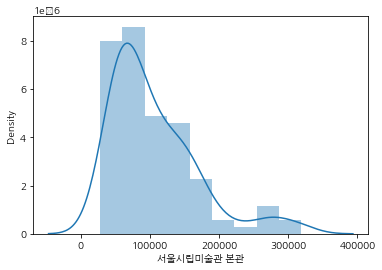

In [ ]:
target_distplot_2(b_SeoulMuseumOfArt)

SunReungJungReung
--

- 전처리 이후

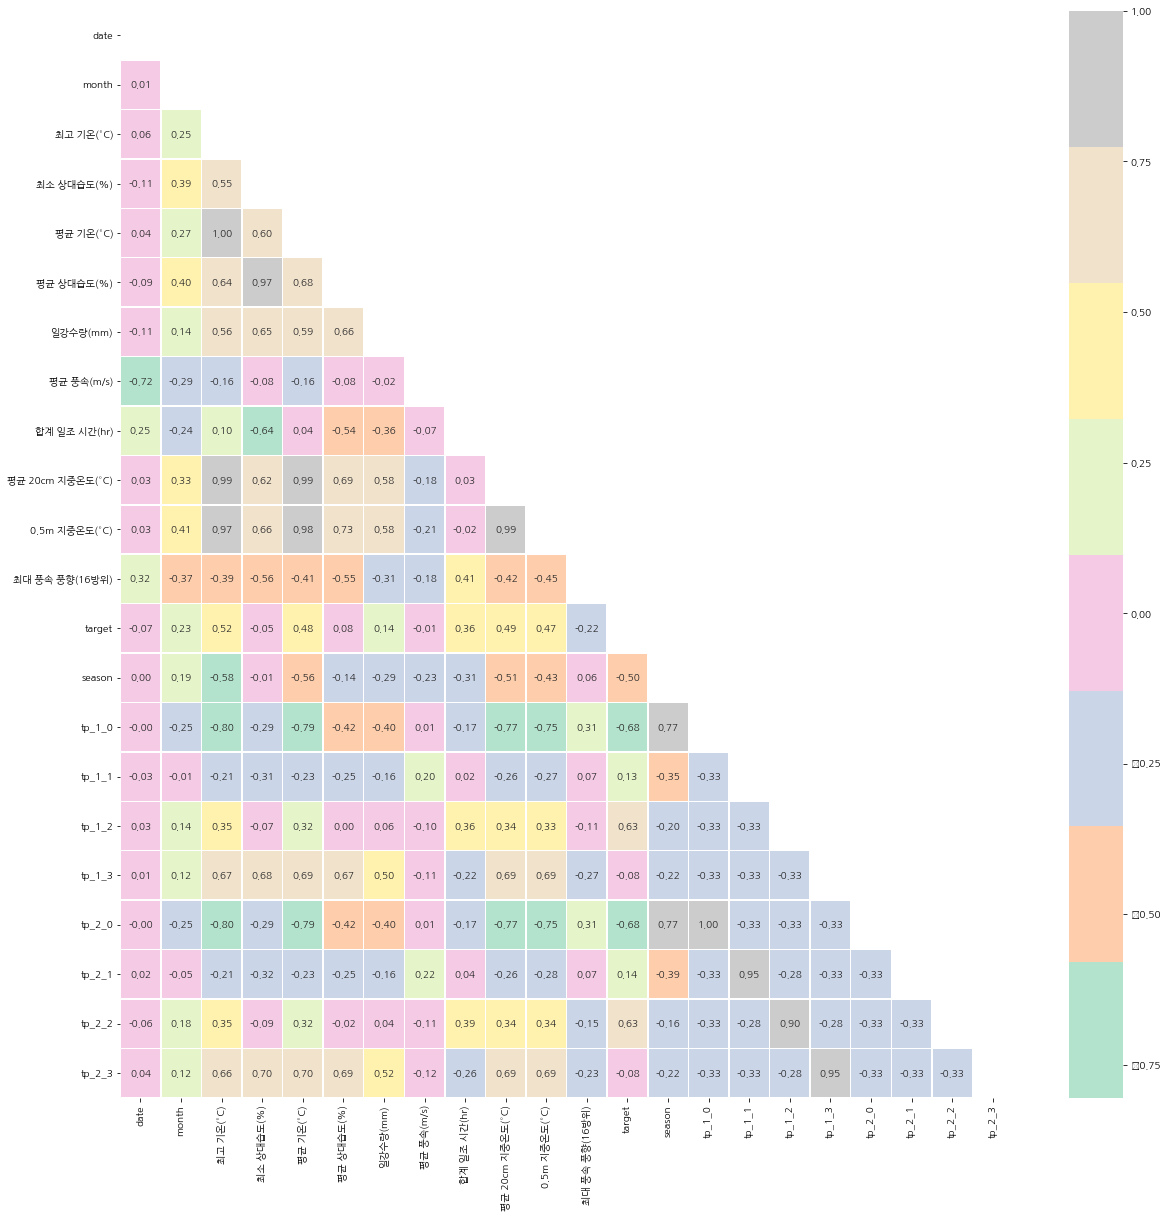

In [ ]:
heatmap(SunReungJungReung)

In [ ]:
statsmodel(SunReungJungReung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           7.79e-18
Time:                        07:39:11   Log-Likelihood:                -1108.9
No. Observations:                 108   AIC:                             2256.
Df Residuals:                      89   BIC:                             2307.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.152e+06    7.2e+05      1.601      0.113   -2.78e+05    2.58e+06
date                -8.3945      5.362     -1.566      0.121     -19.049       2.260
month              537.7529    380.235      1.414      0.161    -217.765    1293.271
최고 기온(°C)         1553.8648   2446.297      0.635      0.527   -3306.875    6414.604
최소 상대습도(%)        -802.0080    529.326     -1.515      0.133   -1853.768     249.752
평균 기온(°C)        -1854.5919   2586.463     -0.717      0.475   -6993.839    3284.655
평균 상대습도(%)         520.4371    468.303      1.111      0.269    -410.072    1450.946
일강수량(mm)            51.4347    154.320      0.333      0.740    -255.195     358.065
평균 풍속(m/s)       -2687.0233   3068.230     -0.876      0.384   -8783.531    3409.484
합계 일조 시간(hr)        18.0344   1308.138      0.014      0.989   -2581.209    2617.278
평균 20cm 지중온도(°C)  1456.4387   1661.589      0.877      0.383   -1845.103    4757.981
0.5m 지중온도(°C)    -1415.8962   1586.870     -0.892      0.375   -4568.973    1737.181
최대 풍속 풍향(16방위)     -51.7450     41.514     -1.246      0.216    -134.232      30.742
season            1044.4247   2088.118      0.500      0.618   -3104.621    5193.470
tp_1_0            2.796e+05    1.8e+05      1.550      0.125   -7.89e+04    6.38e+05
tp_1_1            2.883e+05   1.79e+05      1.606      0.112   -6.83e+04    6.45e+05
tp_1_2            2.966e+05    1.8e+05      1.644      0.104   -6.19e+04    6.55e+05
tp_1_3            2.874e+05   1.79e+05      1.602      0.113    -6.9e+04    6.44e+05
tp_2_0            2.796e+05    1.8e+05      1.550      0.125   -7.89e+04    6.38e+05
tp_2_1            2.884e+05   1.81e+05      1.597      0.114   -7.04e+04    6.47e+05
tp_2_2            2.923e+05   1.79e+05      1.636      0.105   -6.27e+04    6.47e+05
tp_2_3            2.916e+05    1.8e+05      1.620      0.109   -6.61e+04    6.49e+05
==============================================================================
Omnibus:                       54.286   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.907
Skew:                           1.681   Prob(JB):                     1.07e-48
Kurtosis:                       9.147   Cond. No.                     6.31e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

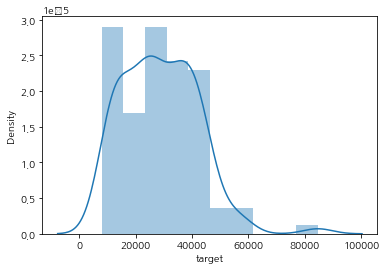

In [ ]:
target_distplot(SunReungJungReung)

- 전처리 이전

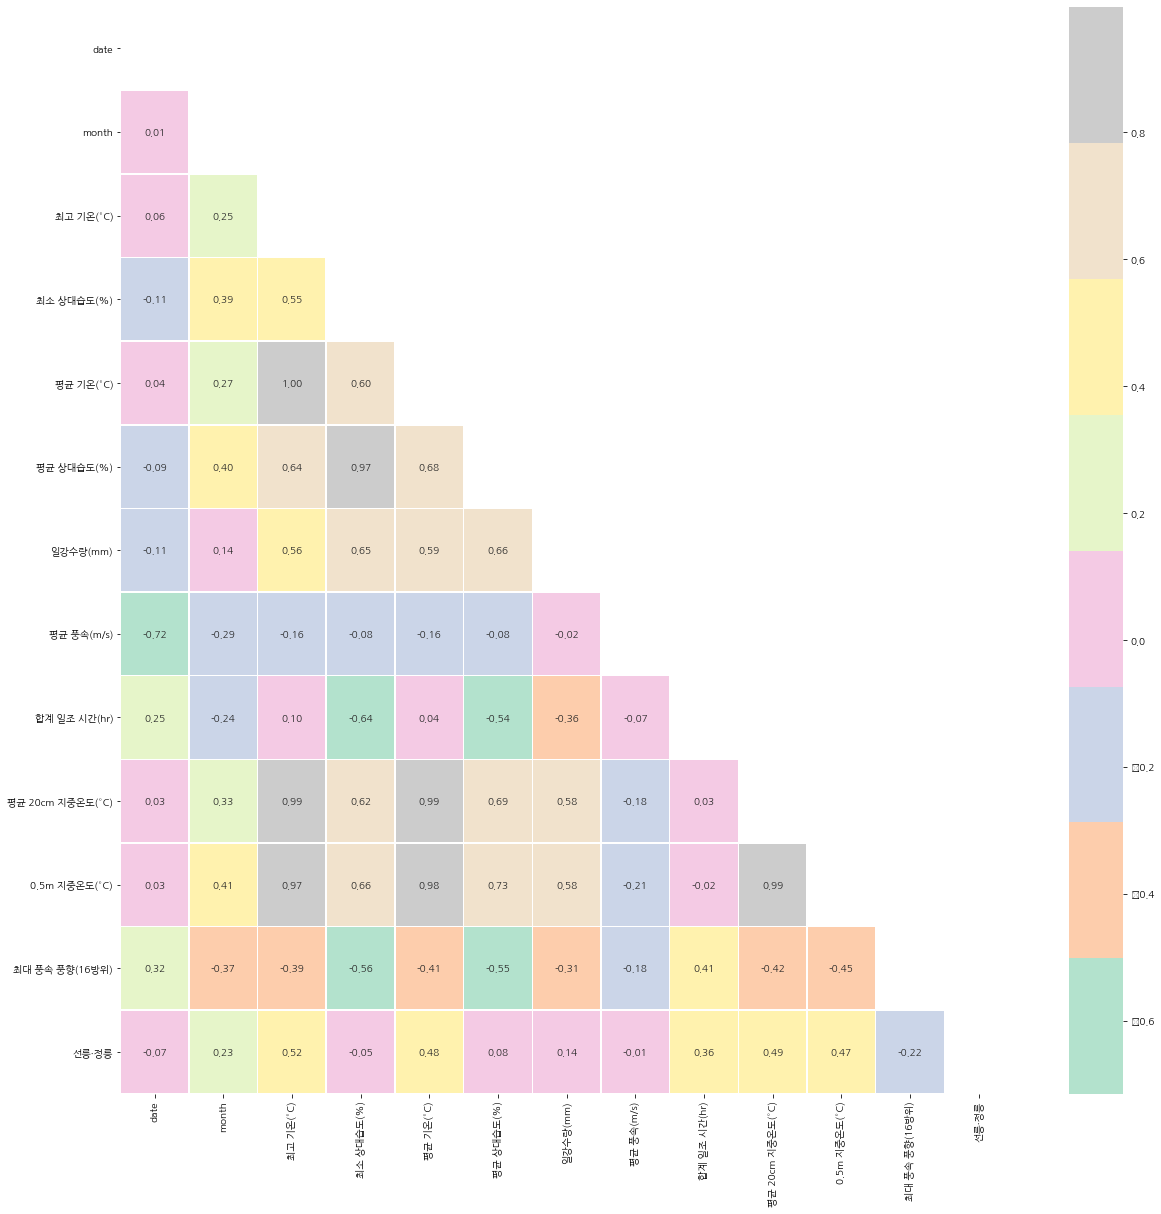

In [ ]:
heatmap(b_SunReungJungReung)

In [ ]:
statsmodel_2(b_SunReungJungReung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  선릉·정릉   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     12.53
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           6.67e-15
Time:                        09:03:25   Log-Likelihood:                -1127.3
No. Observations:                 108   AIC:                             2281.
Df Residuals:                      95   BIC:                             2316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.303e+06   1.13e+06      2.035      0.045    5.61e+04    4.55e+06
date               -11.4255      5.624     -2.032      0.045     -22.590      -0.261
month              635.4644    416.004      1.528      0.130    -190.409    1461.338
최고 기온(°C)         7034.7016   2518.868      2.793      0.006    2034.117     1.2e+04
최소 상대습도(%)       -1533.1339    569.648     -2.691      0.008   -2664.028    -402.240
평균 기온(°C)        -7207.4357   2684.571     -2.685      0.009   -1.25e+04   -1877.889
평균 상대습도(%)        1024.3030    518.273      1.976      0.051      -4.598    2053.204
일강수량(mm)           123.3902    175.034      0.705      0.483    -224.097     470.877
평균 풍속(m/s)       -1510.1145   3175.241     -0.476      0.635   -7813.764    4793.535
합계 일조 시간(hr)     -1200.6237   1348.006     -0.891      0.375   -3876.753    1475.506
평균 20cm 지중온도(°C)   548.9456   1676.198      0.327      0.744   -2778.728    3876.619
0.5m 지중온도(°C)      410.1822   1326.230      0.309      0.758   -2222.718    3043.082
최대 풍속 풍향(16방위)     -61.3385     43.195     -1.420      0.159    -147.092      24.415
==============================================================================
Omnibus:                       48.392   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.116
Skew:                           1.507   Prob(JB):                     2.10e-39
Kurtosis:                       8.522   Cond. No.                     2.69e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

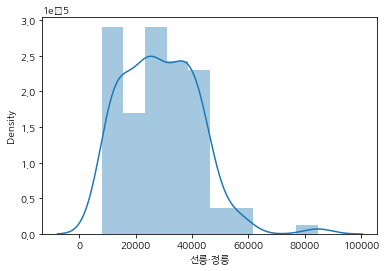

In [ ]:
target_distplot_2(b_SunReungJungReung)

JongMyo
--

- 전처리 이후

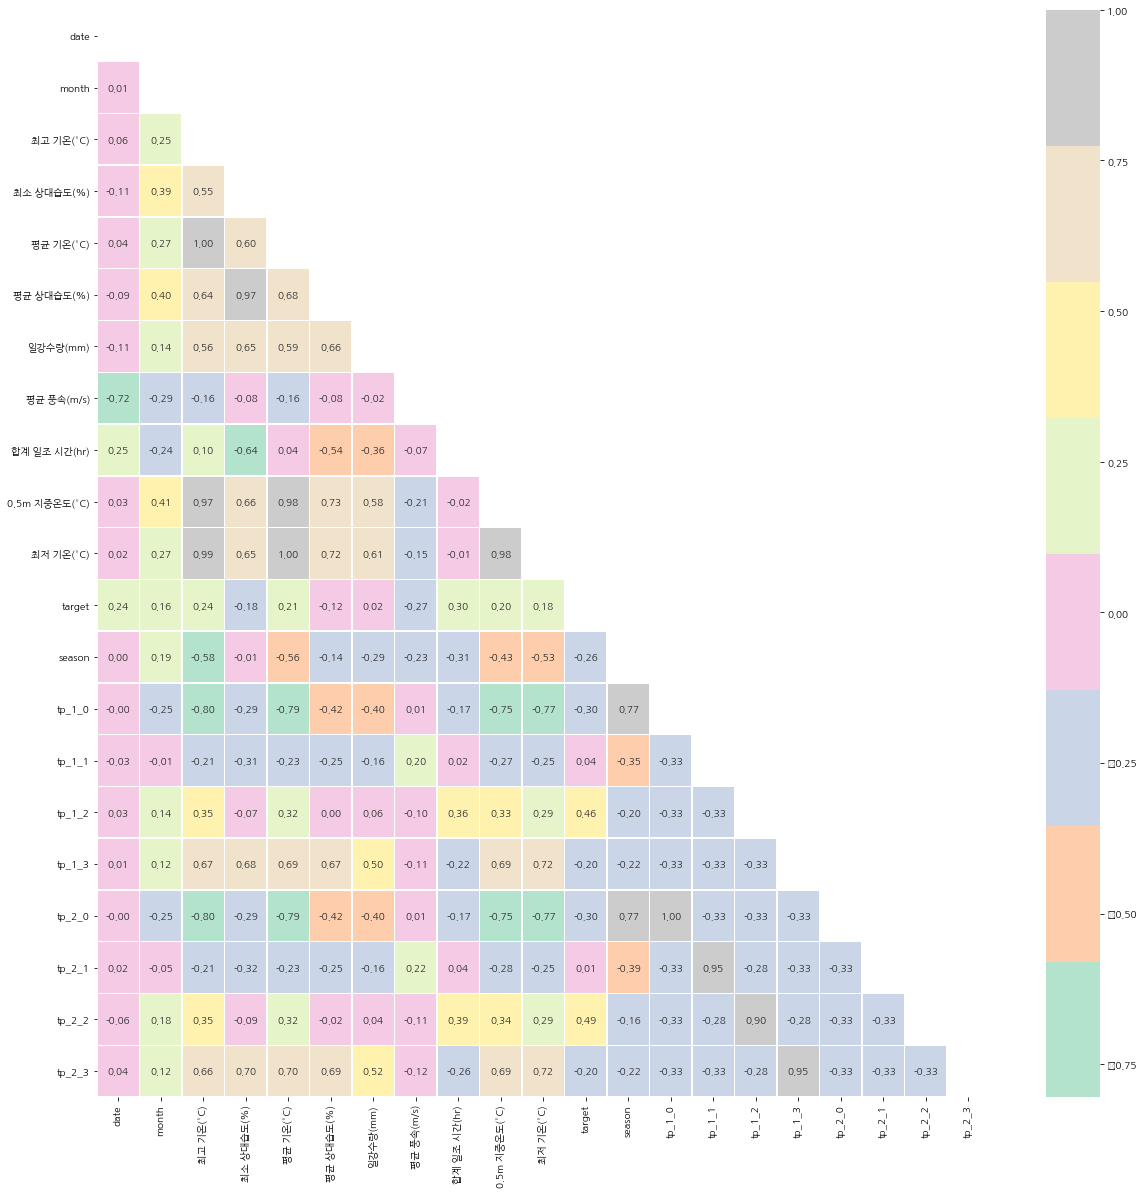

In [ ]:
heatmap(JongMyo)

In [ ]:
statsmodel(JongMyo)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     4.314
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           2.40e-06
Time:                        07:39:13   Log-Likelihood:                -1165.4
No. Observations:                 108   AIC:                             2367.
Df Residuals:                      90   BIC:                             2415.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.34e+06   1.23e+06     -1.088      0.280   -3.79e+06    1.11e+06
date             10.3555      9.178      1.128      0.262      -7.879      28.590
month           791.7911    650.296      1.218      0.227    -500.135    2083.717
최고 기온(°C)      3319.9841   5714.429      0.581      0.563   -8032.727    1.47e+04
최소 상대습도(%)     -667.9374    866.323     -0.771      0.443   -2389.039    1053.164
평균 기온(°C)     -5209.9330   1.19e+04     -0.436      0.664   -2.89e+04    1.85e+04
평균 상대습도(%)     -172.6797    788.376     -0.219      0.827   -1738.926    1393.567
일강수량(mm)        190.1294    253.124      0.751      0.455    -312.746     693.005
평균 풍속(m/s)    -4704.3805   5020.790     -0.937      0.351   -1.47e+04    5270.295
합계 일조 시간(hr)  -3027.9189   2126.751     -1.424      0.158   -7253.080    1197.242
0.5m 지중온도(°C)  1213.5972   1547.632      0.784      0.435   -1861.044    4288.238
최저 기온(°C)      1686.5492   7085.469      0.238      0.812   -1.24e+04    1.58e+04
season        -6548.8703   3114.789     -2.103      0.038   -1.27e+04    -360.798
tp_1_0        -3.296e+05   3.09e+05     -1.068      0.288   -9.43e+05    2.83e+05
tp_1_1        -3.276e+05   3.07e+05     -1.066      0.289   -9.38e+05    2.83e+05
tp_1_2        -3.387e+05   3.09e+05     -1.096      0.276   -9.53e+05    2.75e+05
tp_1_3         -3.44e+05   3.07e+05     -1.119      0.266   -9.55e+05    2.67e+05
tp_2_0        -3.296e+05   3.09e+05     -1.068      0.288   -9.43e+05    2.83e+05
tp_2_1        -3.452e+05   3.09e+05     -1.117      0.267   -9.59e+05    2.69e+05
tp_2_2        -3.254e+05   3.06e+05     -1.065      0.290   -9.33e+05    2.82e+05
tp_2_3        -3.398e+05   3.09e+05     -1.100      0.274   -9.53e+05    2.74e+05
==============================================================================
Omnibus:                       13.617   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.662
Skew:                           0.859   Prob(JB):                     0.000655
Kurtosis:                       3.555   Cond. No.                     1.20e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

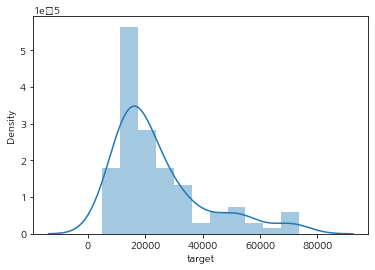

In [ ]:
target_distplot(JongMyo)

- 전처리 이전

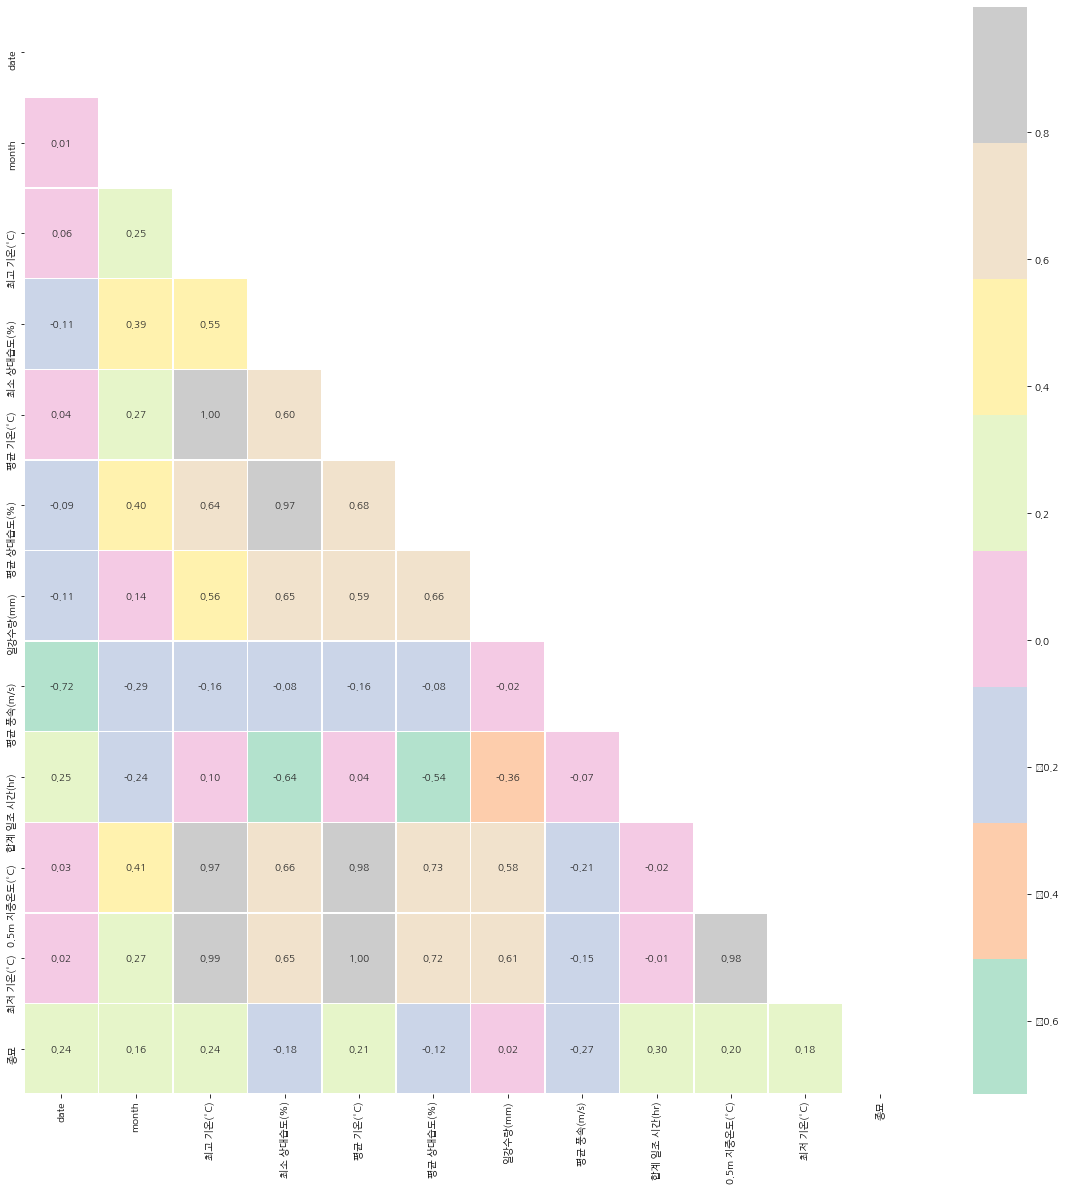

In [ ]:
heatmap(b_JongMyo)

In [ ]:
statsmodel_2(b_JongMyo)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     종묘   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     4.534
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.64e-05
Time:                        09:04:31   Log-Likelihood:                -1175.0
No. Observations:                 108   AIC:                             2374.
Df Residuals:                      96   BIC:                             2406.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.261e+05   1.73e+06     -0.130      0.896   -3.67e+06    3.21e+06
date              1.3160      8.599      0.153      0.879     -15.753      18.385
month           588.3195    654.919      0.898      0.371    -711.685    1888.324
최고 기온(°C)     -1895.9382   5730.825     -0.331      0.741   -1.33e+04    9479.660
최소 상대습도(%)     -890.2919    857.255     -1.039      0.302   -2591.930     811.346
평균 기온(°C)      1.374e+04   1.15e+04      1.192      0.236   -9151.296    3.66e+04
평균 상대습도(%)       22.7290    796.762      0.029      0.977   -1558.832    1604.290
일강수량(mm)        224.3406    265.979      0.843      0.401    -303.624     752.305
평균 풍속(m/s)    -5460.3560   4772.994     -1.144      0.255   -1.49e+04    4013.962
합계 일조 시간(hr)  -3384.3068   2053.174     -1.648      0.103   -7459.826     691.212
0.5m 지중온도(°C)   429.3472   1253.328      0.343      0.733   -2058.488    2917.183
최저 기온(°C)     -1.153e+04   6477.361     -1.780      0.078   -2.44e+04    1324.985
==============================================================================
Omnibus:                       16.008   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.012
Skew:                           0.941   Prob(JB):                     0.000123
Kurtosis:                       3.678   Cond. No.                     2.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

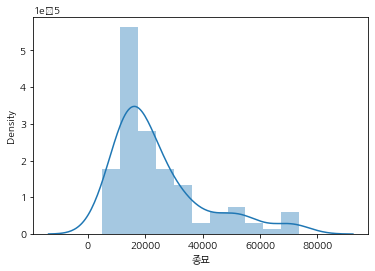

In [ ]:
target_distplot_2(b_JongMyo)

ChangGyeongGung
--

- 전처리 이후

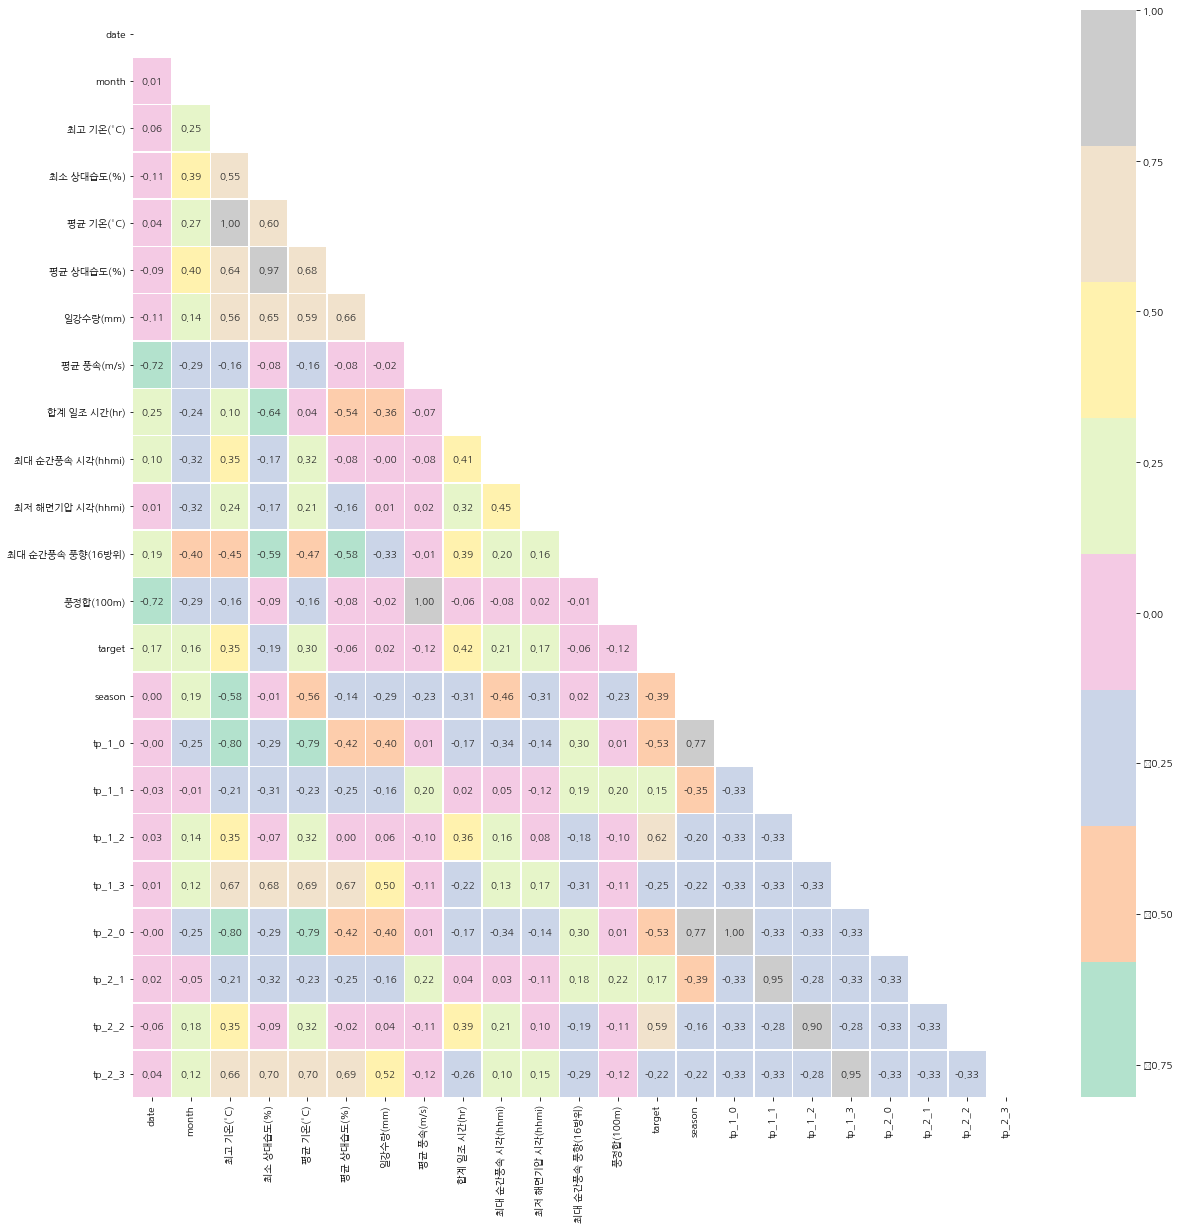

In [ ]:
heatmap(ChangGyeongGung)

In [ ]:
statsmodel(ChangGyeongGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     9.765
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.59e-14
Time:                        07:39:15   Log-Likelihood:                -1221.5
No. Observations:                 108   AIC:                             2483.
Df Residuals:                      88   BIC:                             2537.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -1.23e+06    2.1e+06     -0.587      0.559    -5.4e+06    2.94e+06
date                 8.7495     15.570      0.562      0.576     -22.193      39.692
month              653.1520    916.512      0.713      0.478   -1168.223    2474.527
최고 기온(°C)          1.92e+04   6828.483      2.811      0.006    5625.065    3.28e+04
최소 상대습도(%)       -1311.7679   1497.479     -0.876      0.383   -4287.693    1664.157
평균 기온(°C)        -1.913e+04   6845.780     -2.794      0.006   -3.27e+04   -5525.886
평균 상대습도(%)        1550.1094   1371.884      1.130      0.262   -1176.221    4276.440
일강수량(mm)            75.3796    445.301      0.169      0.866    -809.562     960.321
평균 풍속(m/s)         2.55e+05   4.26e+05      0.598      0.551   -5.92e+05     1.1e+06
합계 일조 시간(hr)     -3031.5366   3476.873     -0.872      0.386   -9941.091    3878.018
최대 순간풍속 시각(hhmi)   -30.8235     30.279     -1.018      0.311     -90.996      29.349
최저 해면기압 시각(hhmi)    36.9363     24.705      1.495      0.138     -12.159      86.032
최대 순간풍속 풍향(16방위)    34.0976    107.520      0.317      0.752    -179.575     247.771
풍정합(100m)         -295.0326    493.223     -0.598      0.551   -1275.210     685.145
season            3943.7354   4537.065      0.869      0.387   -5072.727     1.3e+04
tp_1_0           -3.212e+05   5.26e+05     -0.611      0.543   -1.37e+06    7.24e+05
tp_1_1           -2.992e+05   5.23e+05     -0.572      0.569   -1.34e+06    7.41e+05
tp_1_2           -2.858e+05   5.25e+05     -0.544      0.588   -1.33e+06    7.58e+05
tp_1_3           -3.241e+05   5.23e+05     -0.620      0.537   -1.36e+06    7.15e+05
tp_2_0           -3.212e+05   5.26e+05     -0.611      0.543   -1.37e+06    7.24e+05
tp_2_1           -3.101e+05   5.26e+05     -0.589      0.557   -1.36e+06    7.35e+05
tp_2_2           -2.997e+05   5.21e+05     -0.576      0.566   -1.33e+06    7.35e+05
tp_2_3           -2.994e+05   5.25e+05     -0.571      0.570   -1.34e+06    7.43e+05
==============================================================================
Omnibus:                        7.481   Durbin-Watson:                   2.370
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               10.394
Skew:                           0.309   Prob(JB):                      0.00553
Kurtosis:                       4.388   Cond. No.                     6.16e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

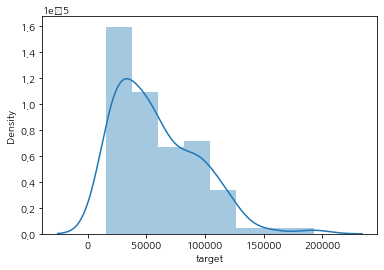

In [ ]:
target_distplot(ChangGyeongGung)

- 전처리 이전

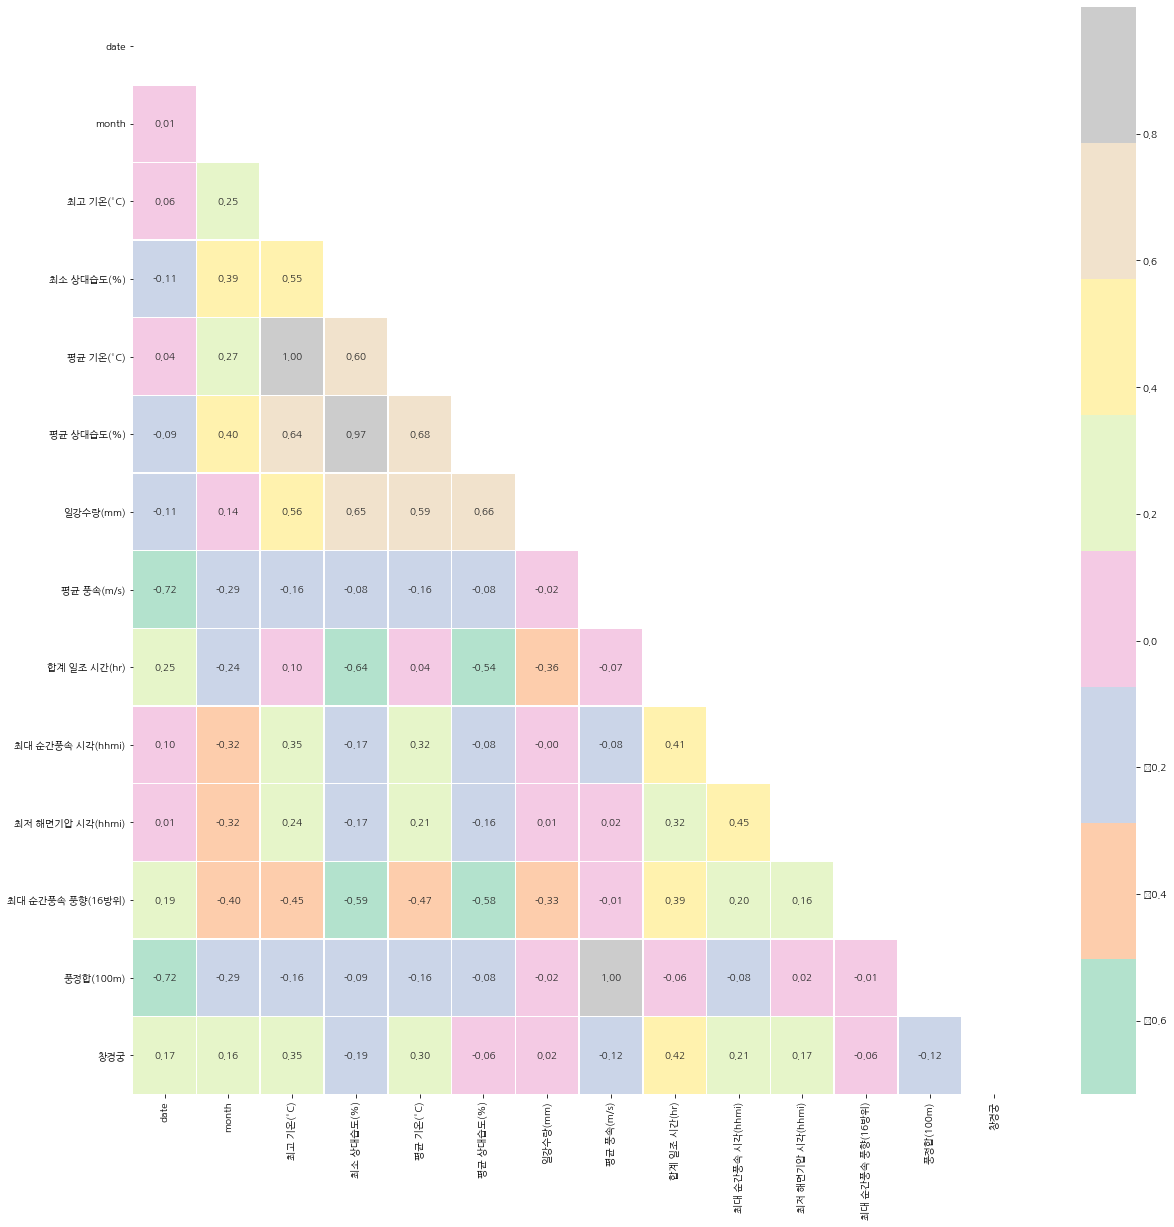

In [ ]:
heatmap(b_ChangGyeongGung)

In [ ]:
statsmodel_2(b_ChangGyeongGung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창경궁   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     8.871
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.49e-11
Time:                        09:06:39   Log-Likelihood:                -1239.6
No. Observations:                 108   AIC:                             2507.
Df Residuals:                      94   BIC:                             2545.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.922e+06   3.17e+06      0.606      0.546   -4.38e+06    8.22e+06
date                -9.9571     15.710     -0.634      0.528     -41.150      21.236
month             1900.3508    940.584      2.020      0.046      32.800    3767.902
최고 기온(°C)         3.255e+04   7104.076      4.583      0.000    1.84e+04    4.67e+04
최소 상대습도(%)       -2280.0535   1601.135     -1.424      0.158   -5459.144     899.037
평균 기온(°C)         -3.17e+04   7229.984     -4.384      0.000   -4.61e+04   -1.73e+04
평균 상대습도(%)        2035.0341   1524.780      1.335      0.185    -992.452    5062.520
일강수량(mm)           184.8451    499.483      0.370      0.712    -806.889    1176.580
평균 풍속(m/s)        4.798e+05   4.51e+05      1.065      0.290   -4.15e+05    1.37e+06
합계 일조 시간(hr)     -4441.5118   3607.917     -1.231      0.221   -1.16e+04    2722.092
최대 순간풍속 시각(hhmi)   -26.0158     33.709     -0.772      0.442     -92.945      40.913
최저 해면기압 시각(hhmi)     7.9077     27.243      0.290      0.772     -46.183      61.999
최대 순간풍속 풍향(16방위)   -24.4350    113.220     -0.216      0.830    -249.236     200.366
풍정합(100m)         -560.8276    522.451     -1.073      0.286   -1598.166     476.510
==============================================================================
Omnibus:                        6.989   Durbin-Watson:                   2.356
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                9.992
Skew:                           0.260   Prob(JB):                      0.00677
Kurtosis:                       4.396   Cond. No.                     2.66e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

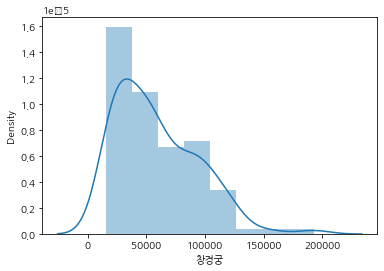

In [ ]:
target_distplot_2(b_ChangGyeongGung)

TaeReungGangNeung
--

- 전처리 이후

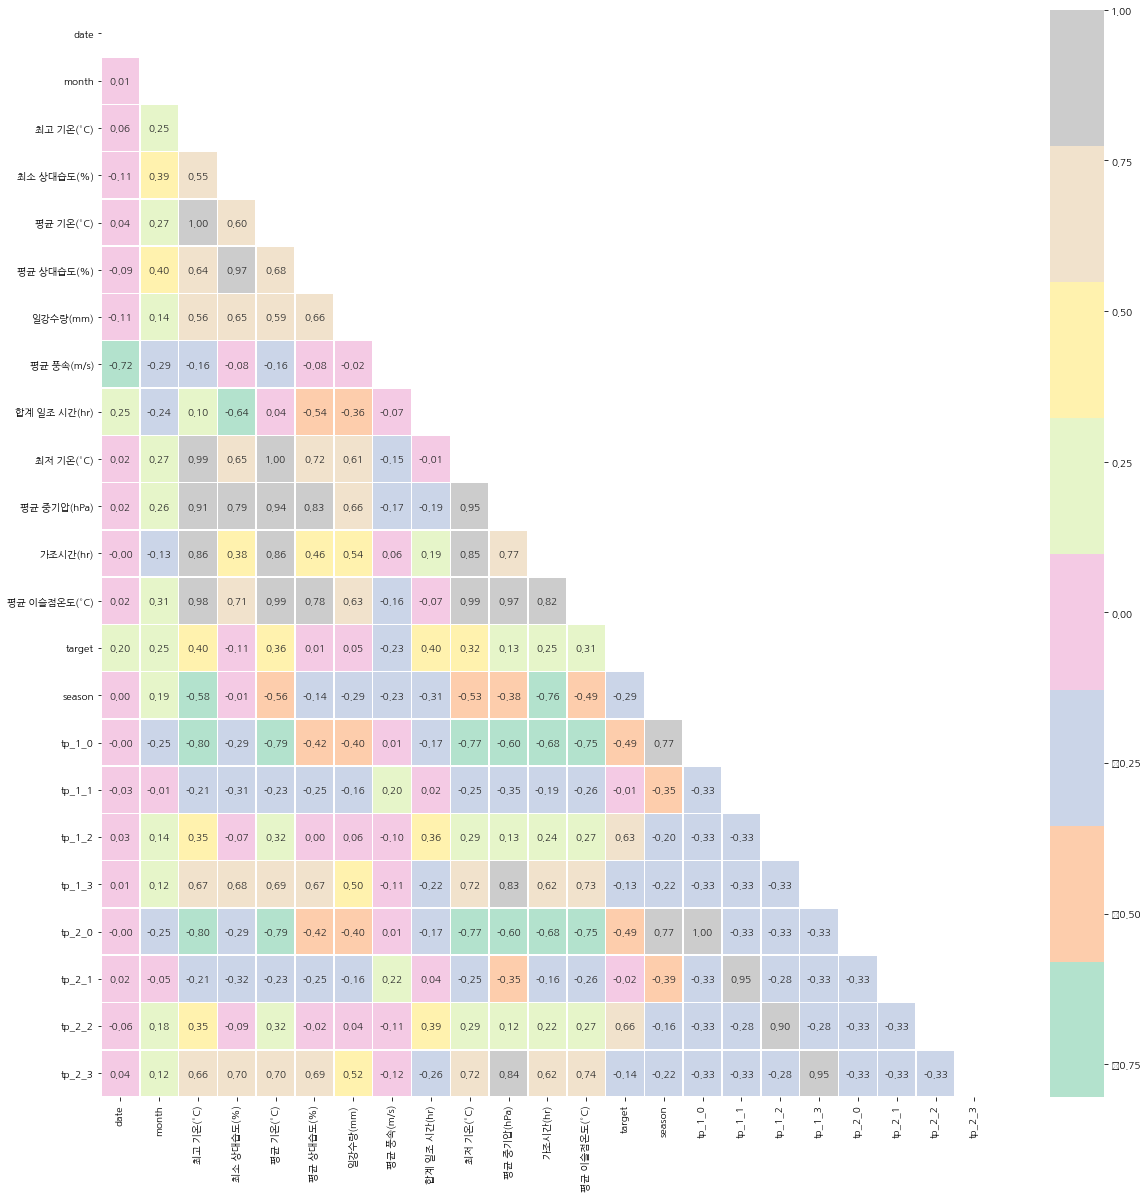

In [ ]:
heatmap(TaeReungGangNeung)

In [ ]:
statsmodel(TaeReungGangNeung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     10.90
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           7.52e-16
Time:                        07:39:17   Log-Likelihood:                -1024.0
No. Observations:                 108   AIC:                             2088.
Df Residuals:                      88   BIC:                             2142.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -3.93e+05   3.47e+05     -1.134      0.260   -1.08e+06    2.96e+05
date             2.1710      2.608      0.833      0.407      -3.011       7.353
month          114.9633    165.628      0.694      0.489    -214.188     444.115
최고 기온(°C)     1591.4573   1568.800      1.014      0.313   -1526.204    4709.118
최소 상대습도(%)    -270.4358    232.350     -1.164      0.248    -732.182     191.311
평균 기온(°C)     4286.7354   3831.635      1.119      0.266   -3327.835    1.19e+04
평균 상대습도(%)    2119.5751    728.374      2.910      0.005     672.086    3567.065
일강수량(mm)       -10.8693     76.340     -0.142      0.887    -162.579     140.841
평균 풍속(m/s)    -954.5117   1390.135     -0.687      0.494   -3717.113    1808.090
합계 일조 시간(hr)   -84.7415    613.545     -0.138      0.890   -1304.033    1134.550
최저 기온(°C)      212.0604   2125.888      0.100      0.921   -4012.695    4436.816
평균 중기압(hPa)   -424.5844    474.827     -0.894      0.374   -1368.203     519.034
가조시간(hr)      -778.5806    936.993     -0.831      0.408   -2640.657    1083.496
평균 이슬점온도(°C) -6520.9282   2715.993     -2.401      0.018   -1.19e+04   -1123.464
season        1060.1029   1069.143      0.992      0.324   -1064.594    3184.800
tp_1_0       -1.024e+05   8.68e+04     -1.180      0.241   -2.75e+05    7.01e+04
tp_1_1       -9.821e+04   8.65e+04     -1.136      0.259    -2.7e+05    7.36e+04
tp_1_2        -9.64e+04    8.7e+04     -1.109      0.271   -2.69e+05    7.64e+04
tp_1_3       -9.596e+04   8.64e+04     -1.111      0.270   -2.68e+05    7.57e+04
tp_2_0       -1.024e+05   8.68e+04     -1.180      0.241   -2.75e+05    7.01e+04
tp_2_1       -1.017e+05    8.7e+04     -1.169      0.246   -2.75e+05    7.12e+04
tp_2_2       -9.378e+04    8.6e+04     -1.090      0.278   -2.65e+05    7.71e+04
tp_2_3       -9.508e+04   8.68e+04     -1.096      0.276   -2.68e+05    7.73e+04
==============================================================================
Omnibus:                       14.049   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.117
Skew:                           0.511   Prob(JB):                     2.13e-06
Kurtosis:                       5.181   Cond. No.                     7.37e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.07e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

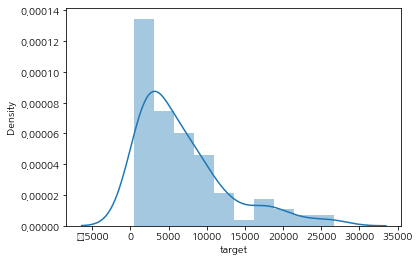

In [ ]:
target_distplot(TaeReungGangNeung)

- 전처리 이전

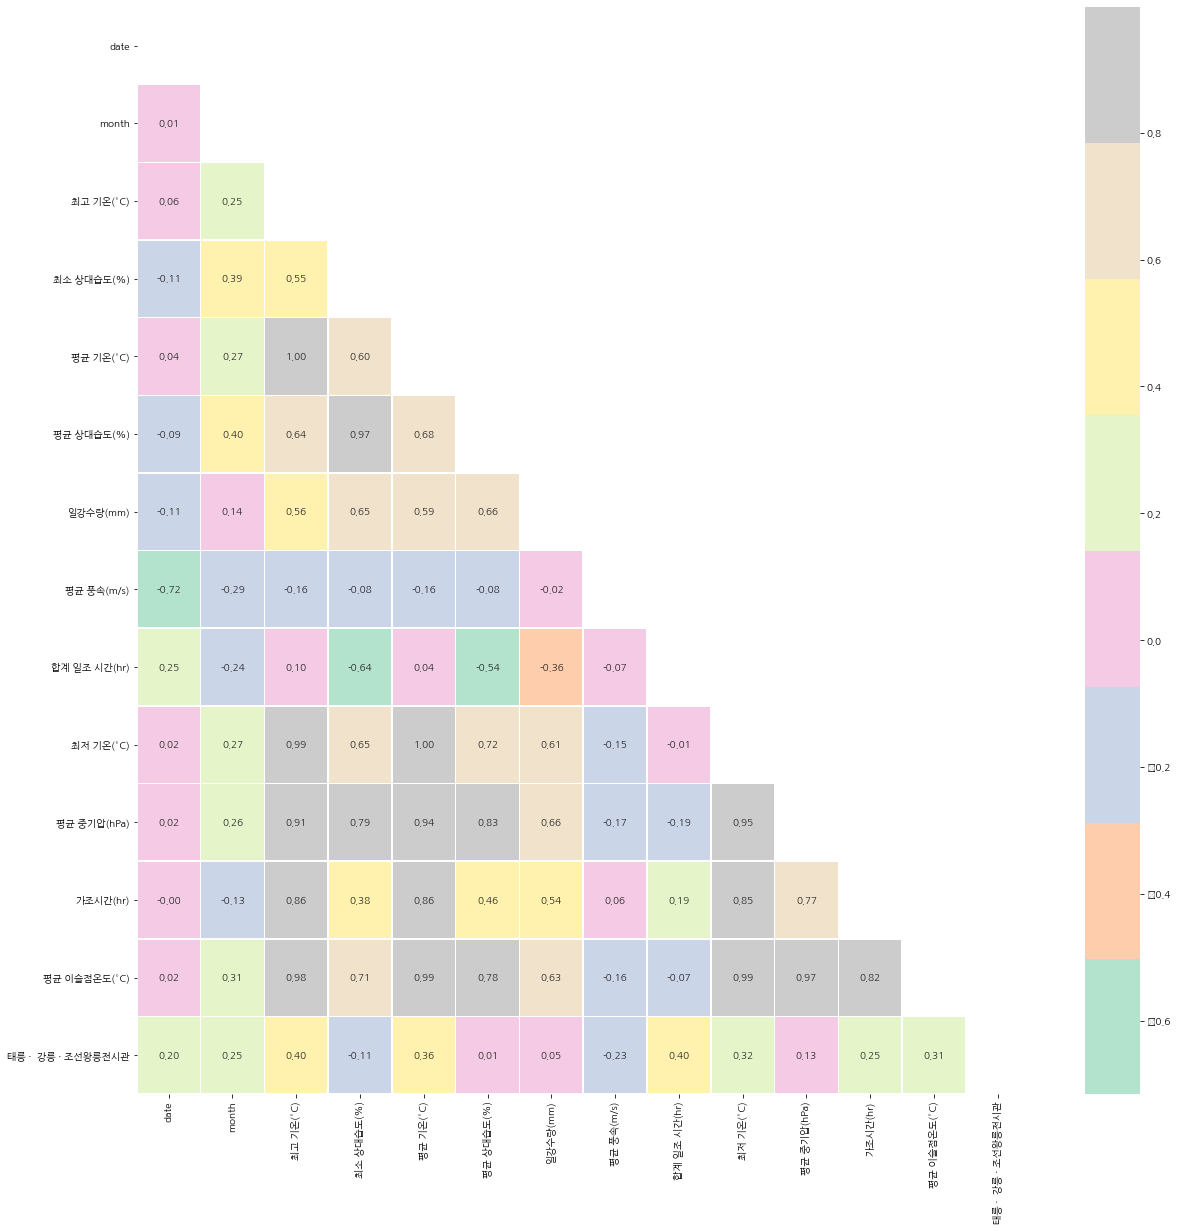

In [ ]:
heatmap(b_TaeReungGangNeung)

In [ ]:
statsmodel_2(b_TaeReungGangNeung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     태릉 ·  강릉 · 조선왕릉전시관   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     10.87
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           9.64e-14
Time:                        09:08:18   Log-Likelihood:                -1039.8
No. Observations:                 108   AIC:                             2108.
Df Residuals:                      94   BIC:                             2145.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.445e+05   5.11e+05      0.674      0.502   -6.71e+05    1.36e+06
date            -2.0690      2.610     -0.793      0.430      -7.251       3.113
month           69.7132    181.176      0.385      0.701    -290.016     429.442
최고 기온(°C)     1477.6943   1669.157      0.885      0.378   -1836.457    4791.845
최소 상대습도(%)    -106.9063    251.133     -0.426      0.671    -605.537     391.724
평균 기온(°C)     3769.6129   3931.302      0.959      0.340   -4036.079    1.16e+04
평균 상대습도(%)    1087.8433    731.080      1.488      0.140    -363.732    2539.419
일강수량(mm)        18.0463     83.190      0.217      0.829    -147.129     183.222
평균 풍속(m/s)   -2390.8360   1452.736     -1.646      0.103   -5275.278     493.606
합계 일조 시간(hr)   237.5186    670.803      0.354      0.724   -1094.376    1569.413
최저 기온(°C)    -1967.0196   2202.700     -0.893      0.374   -6340.532    2406.493
평균 중기압(hPa)   -660.4386    423.813     -1.558      0.123   -1501.930     181.052
가조시간(hr)     -1271.3311    765.466     -1.661      0.100   -2791.182     248.520
평균 이슬점온도(°C) -2793.4490   2770.237     -1.008      0.316   -8293.820    2706.922
==============================================================================
Omnibus:                       24.463   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.020
Skew:                           1.018   Prob(JB):                     3.36e-09
Kurtosis:                       5.128   Cond. No.                     2.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

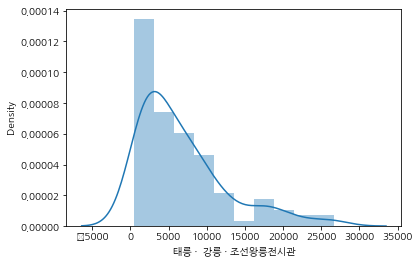

In [ ]:
target_distplot_2(b_TaeReungGangNeung)

TrickEyeMuseum
--

- 전처리 이후

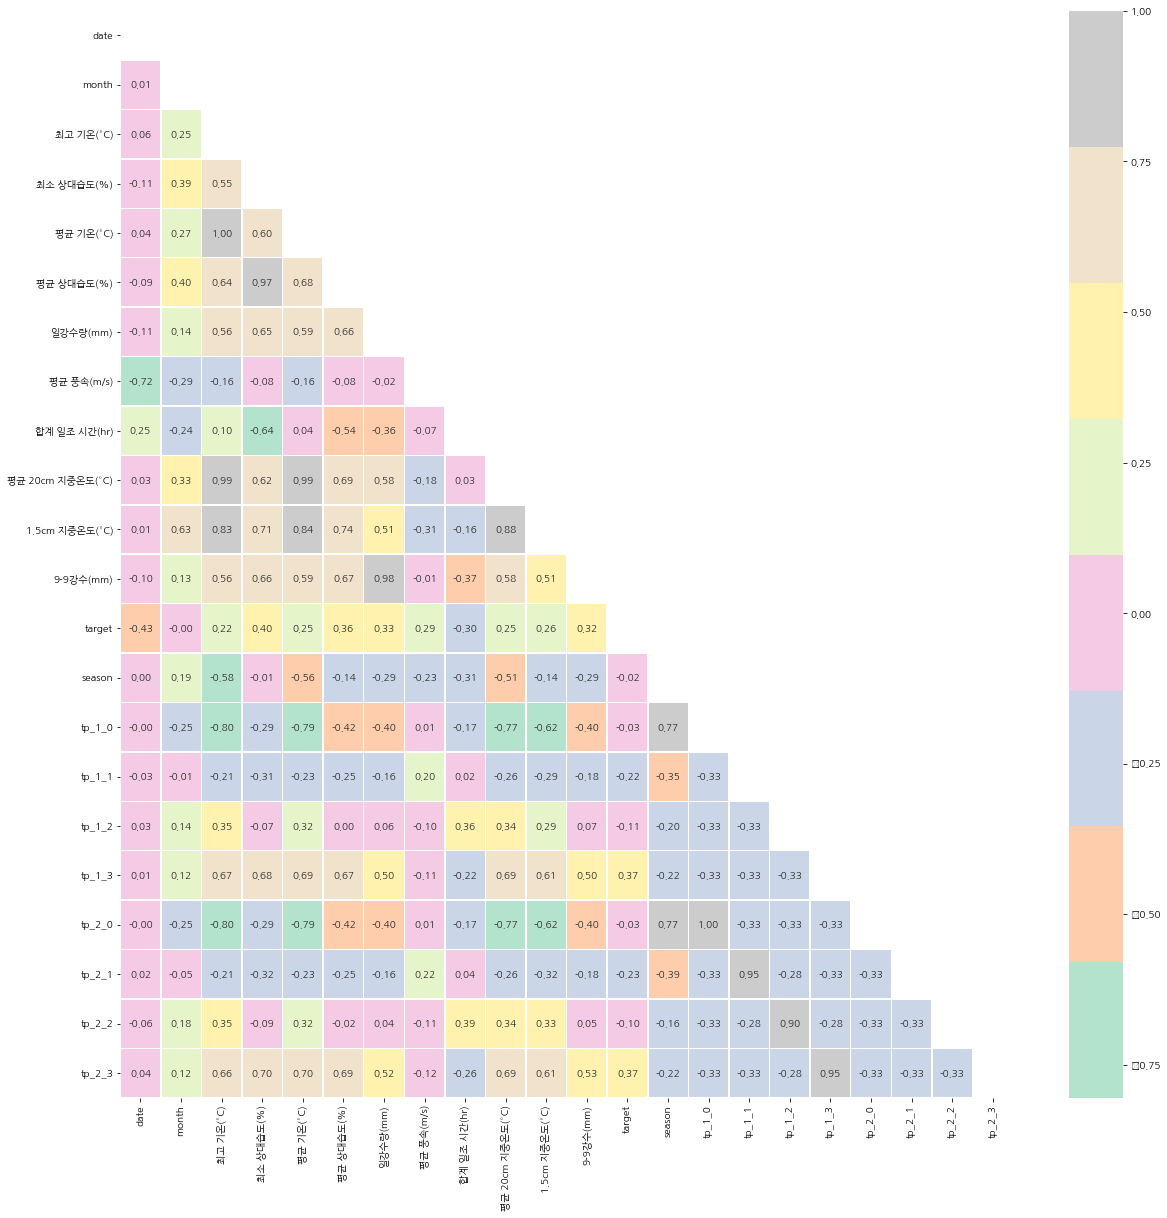

In [ ]:
heatmap(TrickEyeMuseum)

In [ ]:
statsmodel(TrickEyeMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     4.959
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.47e-07
Time:                        07:39:19   Log-Likelihood:                -1112.2
No. Observations:                 108   AIC:                             2262.
Df Residuals:                      89   BIC:                             2313.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.226e+06   7.51e+05      1.633      0.106   -2.66e+05    2.72e+06
date                -9.0591      5.593     -1.620      0.109     -20.173       2.055
month            -1059.2142    428.624     -2.471      0.015   -1910.881    -207.547
최고 기온(°C)        -2553.7308   2472.632     -1.033      0.304   -7466.799    2359.337
최소 상대습도(%)        -336.0697    525.409     -0.640      0.524   -1380.047     707.907
평균 기온(°C)         4282.9128   2631.404      1.628      0.107    -945.630    9511.456
평균 상대습도(%)          45.9103    477.711      0.096      0.924    -903.291     995.112
일강수량(mm)           208.6607    645.517      0.323      0.747   -1073.968    1491.289
평균 풍속(m/s)        4787.5440   3099.131      1.545      0.126   -1370.362    1.09e+04
합계 일조 시간(hr)      -312.5705   1227.371     -0.255      0.800   -2751.330    2126.189
평균 20cm 지중온도(°C) -2685.9137   1137.475     -2.361      0.020   -4946.052    -425.775
1.5cm 지중온도(°C)    3210.0718    856.298      3.749      0.000    1508.626    4911.517
9-9강수(mm)          -90.3125    665.816     -0.136      0.892   -1413.274    1232.649
season           -7622.3604   2692.462     -2.831      0.006    -1.3e+04   -2272.495
tp_1_0             3.16e+05   1.88e+05      1.678      0.097   -5.82e+04     6.9e+05
tp_1_1            3.018e+05   1.87e+05      1.610      0.111   -7.06e+04    6.74e+05
tp_1_2            3.033e+05   1.88e+05      1.611      0.111   -7.08e+04    6.77e+05
tp_1_3            3.051e+05   1.87e+05      1.630      0.107   -6.69e+04    6.77e+05
tp_2_0             3.16e+05   1.88e+05      1.678      0.097   -5.82e+04     6.9e+05
tp_2_1            3.068e+05   1.88e+05      1.628      0.107   -6.76e+04    6.81e+05
tp_2_2            3.019e+05   1.86e+05      1.619      0.109   -6.86e+04    6.72e+05
tp_2_3            3.014e+05   1.88e+05      1.603      0.112   -7.22e+04    6.75e+05
==============================================================================
Omnibus:                      126.767   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3503.254
Skew:                           3.873   Prob(JB):                         0.00
Kurtosis:                      29.805   Cond. No.                     2.50e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.04e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

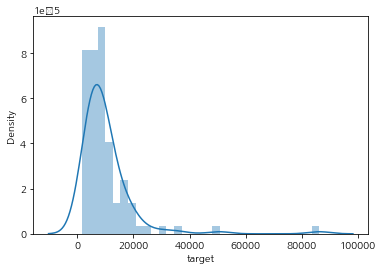

In [ ]:
target_distplot(TrickEyeMuseum)

- 전처리 이전

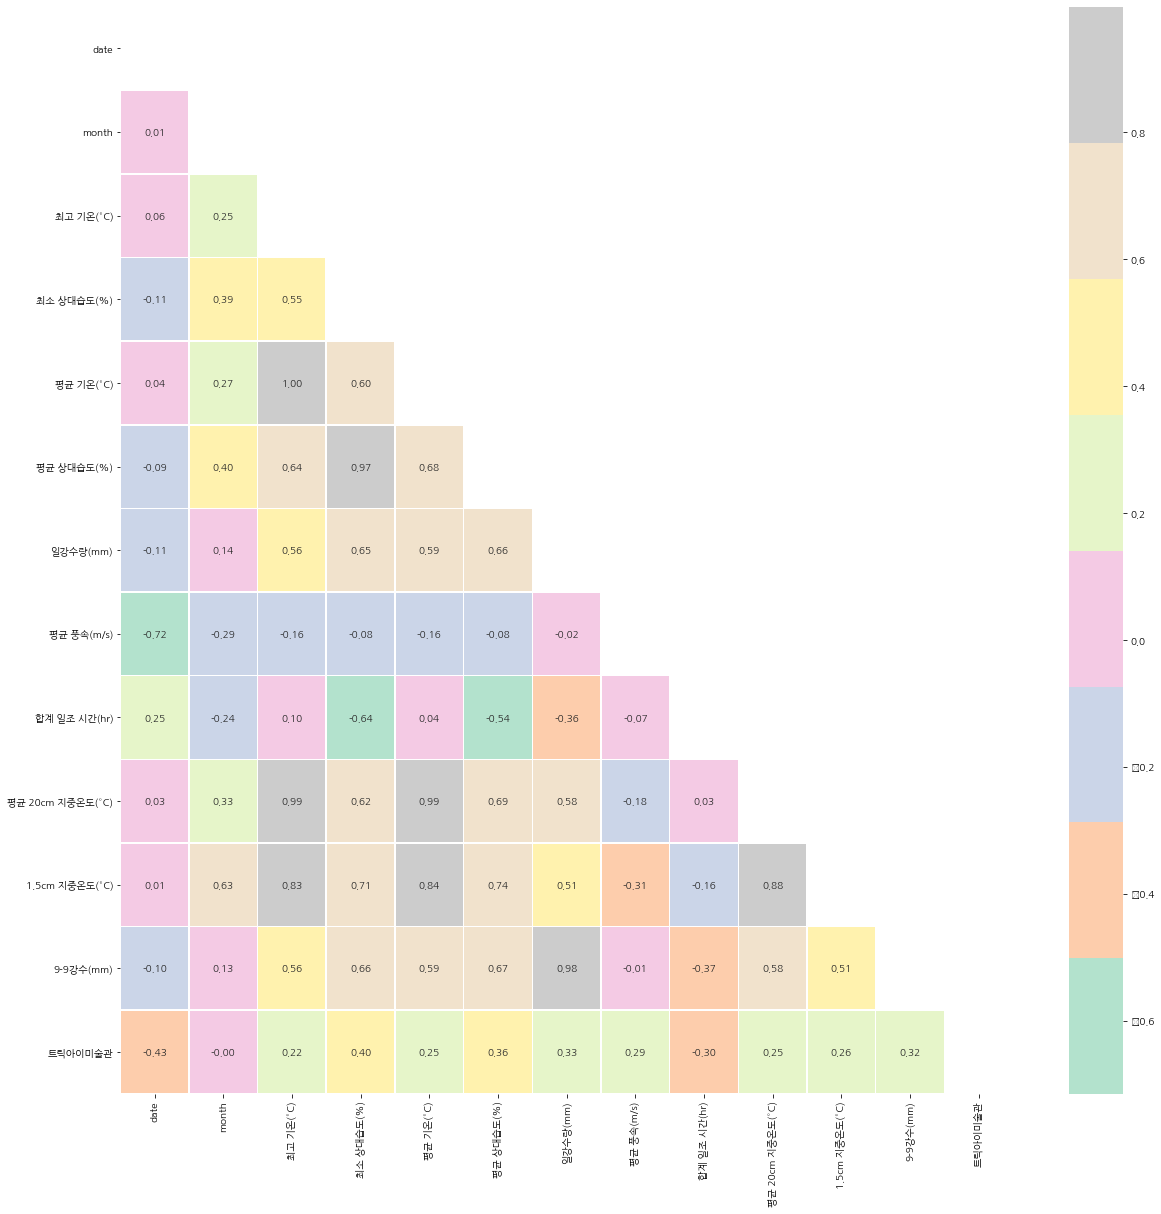

In [ ]:
heatmap(b_TrickEyeMuseum)

In [ ]:
statsmodel_2(b_TrickEyeMuseum)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     6.060
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           9.04e-08
Time:                        09:09:48   Log-Likelihood:                -1119.0
No. Observations:                 108   AIC:                             2264.
Df Residuals:                      95   BIC:                             2299.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.289e+06   1.06e+06      1.220      0.226   -8.09e+05    3.39e+06
date                -6.2613      5.238     -1.195      0.235     -16.659       4.137
month             -756.3066    399.650     -1.892      0.061   -1549.712      37.099
최고 기온(°C)        -6050.1213   2213.787     -2.733      0.007   -1.04e+04   -1655.199
최소 상대습도(%)          62.0606    508.830      0.122      0.903    -948.095    1072.216
평균 기온(°C)         7469.8066   2421.735      3.084      0.003    2662.054    1.23e+04
평균 상대습도(%)        -267.4695    474.685     -0.563      0.574   -1209.839     674.900
일강수량(mm)           501.3023    646.862      0.775      0.440    -782.881    1785.485
평균 풍속(m/s)        5200.9516   2996.253      1.736      0.086    -747.363    1.11e+04
합계 일조 시간(hr)       762.0730   1171.816      0.650      0.517   -1564.276    3088.422
평균 20cm 지중온도(°C) -1681.2412   1081.218     -1.555      0.123   -3827.730     465.247
1.5cm 지중온도(°C)    1113.0194    518.179      2.148      0.034      84.304    2141.735
9-9강수(mm)         -388.8095    665.251     -0.584      0.560   -1709.500     931.881
==============================================================================
Omnibus:                      131.431   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3807.090
Skew:                           4.095   Prob(JB):                         0.00
Kurtosis:                      30.909   Cond. No.                     2.71e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

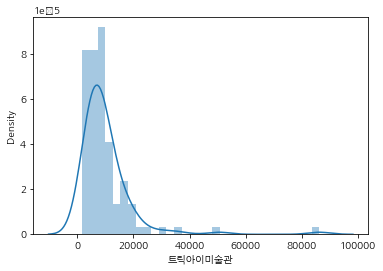

In [ ]:
target_distplot_2(b_TrickEyeMuseum)

HeonLeungInReung
--

- 전처리 이후

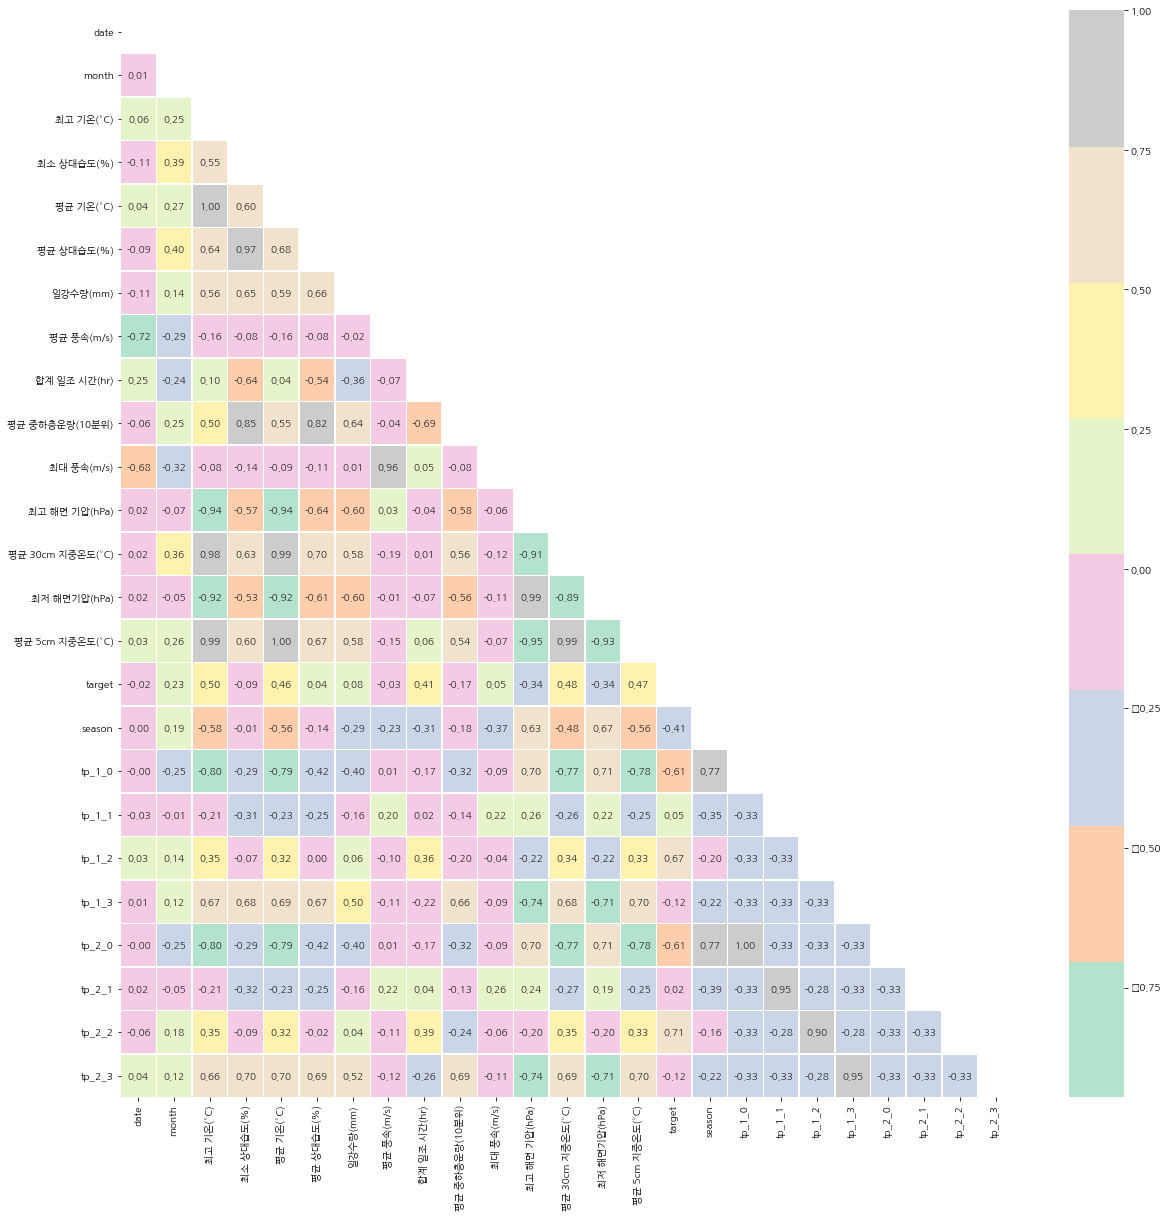

In [ ]:
heatmap(HeonLeungInReung)

In [ ]:
statsmodel(HeonLeungInReung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     16.11
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.63e-21
Time:                        07:39:22   Log-Likelihood:                -884.51
No. Observations:                 108   AIC:                             1813.
Df Residuals:                      86   BIC:                             1872.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.171e+04   1.16e+05      0.616      0.540    -1.6e+05    3.03e+05
date                -0.3296      0.779     -0.423      0.673      -1.879       1.219
month                7.5778     50.629      0.150      0.881     -93.070     108.225
최고 기온(°C)         1461.2908    377.232      3.874      0.000     711.379    2211.203
최소 상대습도(%)        -131.6935     66.876     -1.969      0.052    -264.639       1.252
평균 기온(°C)        -1655.9274    387.654     -4.272      0.000   -2426.559    -885.296
평균 상대습도(%)         122.2790     61.905      1.975      0.051      -0.785     245.343
일강수량(mm)            -7.1877     20.343     -0.353      0.725     -47.628      33.253
평균 풍속(m/s)        1535.2840   1110.596      1.382      0.170    -672.507    3743.075
합계 일조 시간(hr)      -219.7257    194.034     -1.132      0.261    -605.452     166.000
평균 중하층운량(10분위)      68.7875    296.072      0.232      0.817    -519.784     657.359
최대 풍속(m/s)        -633.7636    682.361     -0.929      0.356   -1990.253     722.726
최고 해면 기압(hPa)     -307.8427    195.246     -1.577      0.119    -695.979      80.294
평균 30cm 지중온도(°C)   470.2309    192.060      2.448      0.016      88.429     852.033
최저 해면기압(hPa)       262.4103    172.649      1.520      0.132     -80.804     605.625
평균 5cm 지중온도(°C)   -175.0615    250.112     -0.700      0.486    -672.268     322.145
season            -120.2859    290.794     -0.414      0.680    -698.365     457.793
tp_1_0            1.789e+04   2.92e+04      0.613      0.542   -4.01e+04    7.59e+04
tp_1_1            1.902e+04   2.91e+04      0.654      0.515   -3.88e+04    7.69e+04
tp_1_2            1.808e+04   2.92e+04      0.620      0.537   -3.99e+04     7.6e+04
tp_1_3            1.671e+04    2.9e+04      0.576      0.566   -4.09e+04    7.44e+04
tp_2_0            1.789e+04   2.92e+04      0.613      0.542   -4.01e+04    7.59e+04
tp_2_1            1.683e+04   2.91e+04      0.577      0.565   -4.11e+04    7.48e+04
tp_2_2            1.883e+04    2.9e+04      0.650      0.517   -3.88e+04    7.64e+04
tp_2_3            1.816e+04   2.91e+04      0.623      0.535   -3.98e+04    7.61e+04
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.395
Skew:                           0.101   Prob(JB):                        0.821
Kurtosis:                       2.784   Cond. No.                     1.85e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-34. This might indicate that there are
strong multicollinearity problems or that the desi

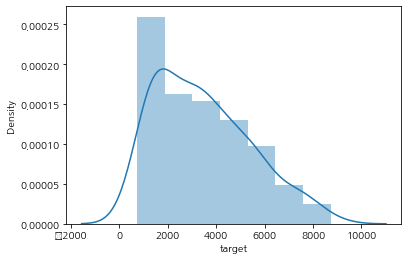

In [ ]:
target_distplot(HeonLeungInReung)

- 전처리 이전

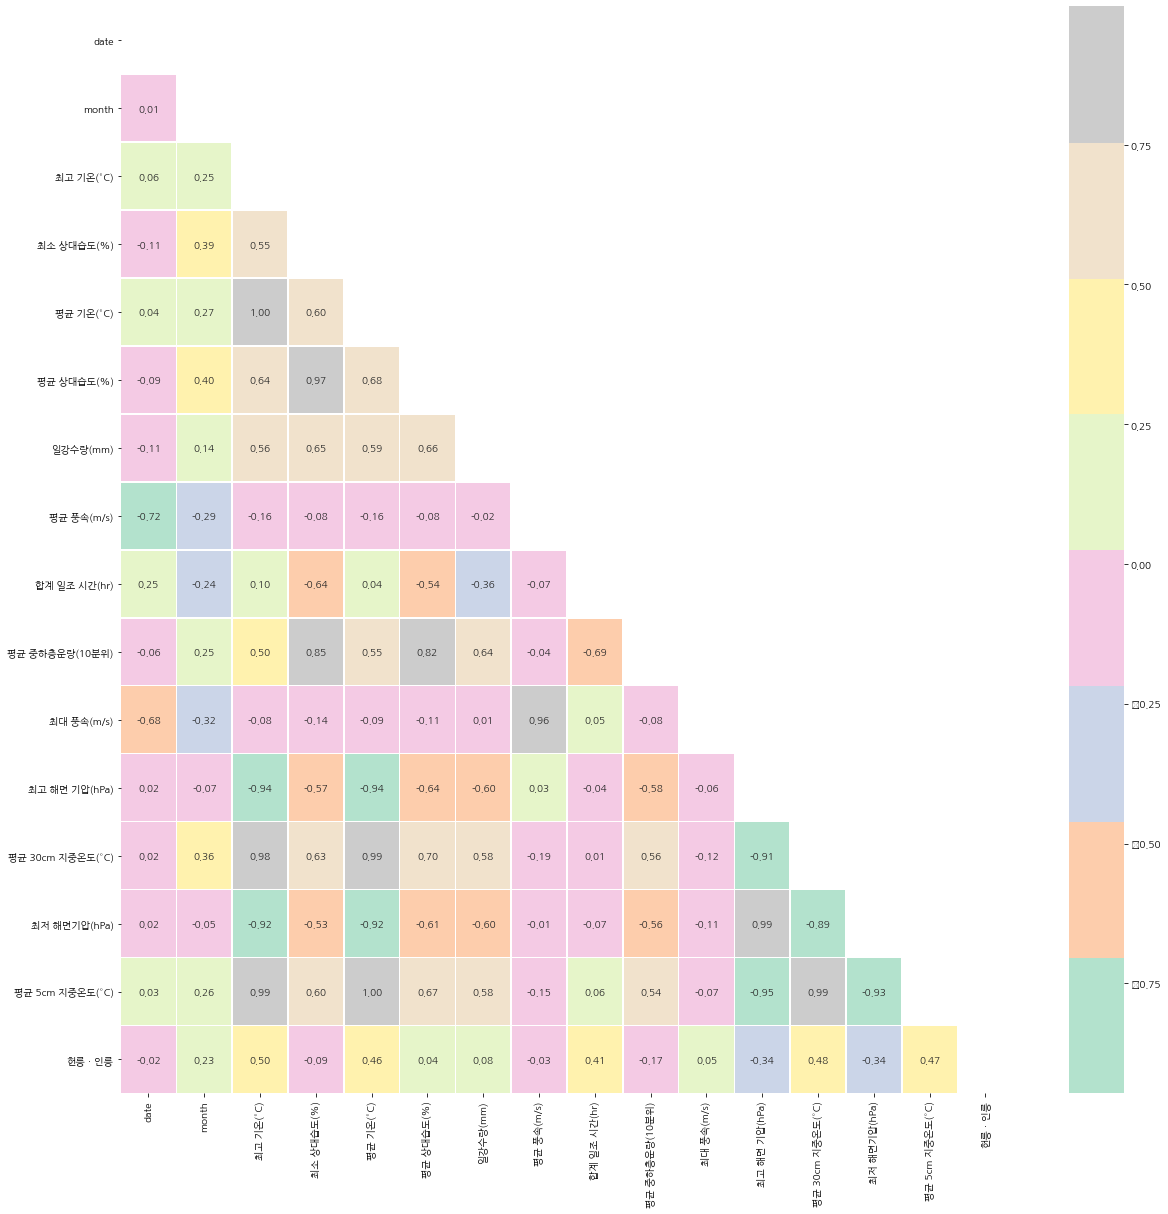

In [ ]:
heatmap(b_HeonLeungInReung)

In [ ]:
statsmodel_2(b_HeonLeungInReung)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  헌릉ㆍ인릉   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     15.51
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           4.47e-19
Time:                        09:11:04   Log-Likelihood:                -902.62
No. Observations:                 108   AIC:                             1837.
Df Residuals:                      92   BIC:                             1880.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.875e+05   1.87e+05      1.002      0.319   -1.84e+05    5.59e+05
date                -1.1046      0.796     -1.387      0.169      -2.686       0.477
month              -10.8972     56.532     -0.193      0.848    -123.175     101.381
최고 기온(°C)         1720.8248    389.679      4.416      0.000     946.888    2494.762
최소 상대습도(%)        -182.2095     72.994     -2.496      0.014    -327.182     -37.237
평균 기온(°C)        -1947.7149    420.816     -4.628      0.000   -2783.492   -1111.937
평균 상대습도(%)         155.0903     68.659      2.259      0.026      18.727     291.454
일강수량(mm)             0.5935     22.947      0.026      0.979     -44.982      46.169
평균 풍속(m/s)        1534.3409   1239.624      1.238      0.219    -927.659    3996.341
합계 일조 시간(hr)      -314.9257    213.568     -1.475      0.144    -739.090     109.238
평균 중하층운량(10분위)    -152.1742    317.689     -0.479      0.633    -783.132     478.783
최대 풍속(m/s)        -749.9405    738.243     -1.016      0.312   -2216.155     716.274
최고 해면 기압(hPa)      -79.1636    215.488     -0.367      0.714    -507.141     348.814
평균 30cm 지중온도(°C)   531.6117    168.934      3.147      0.002     196.094     867.130
최저 해면기압(hPa)       106.9838    193.439      0.553      0.582    -277.203     491.171
평균 5cm 지중온도(°C)   -124.1672    245.685     -0.505      0.614    -612.118     363.784
==============================================================================
Omnibus:                        3.691   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.156
Skew:                           0.300   Prob(JB):                        0.206
Kurtosis:                       3.585   Cond. No.                     3.51e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

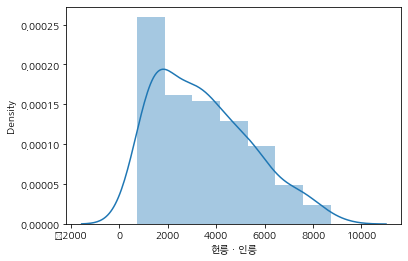

In [ ]:
target_distplot_2(b_HeonLeungInReung)

#Regression Model Choice

In [15]:
class regression_select:
    def linear(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lr=LinearRegression()
        lr.fit(x_train, y_train)
        y_pred=lr.predict(x_test)
        train_score=lr.score(x_train, y_train)
        test_score=lr.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def ridge(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        ridge = Ridge()
        ridge.fit(x_train, y_train)
        y_pred=ridge.predict(x_test)
        train_score=ridge.score(x_train, y_train)
        test_score=ridge.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lasso(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lasso = Lasso()
        lasso.fit(x_train, y_train)
        y_pred=lasso.predict(x_test)
        train_score=lasso.score(x_train, y_train)
        test_score=lasso.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def elasticnet(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        en = ElasticNet()
        en.fit(x_train, y_train)
        y_pred=en.predict(x_test)
        train_score=en.score(x_train, y_train)
        test_score=en.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def xgboost(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        xgb = xgboost.XGBRegressor()
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        test_score=xgb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def lgbm(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         lgbm = lightgbm.LGBMRegressor()
         lgbm.fit(x_train, y_train)
         y_pred=lgbm.predict(x_test)
         train_score=lgbm.score(x_train, y_train)
         test_score=lgbm.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def catboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         cb = catboost.CatBoostRegressor()
         cb.fit(x_train, y_train)
         y_pred=cb.predict(x_test)
         train_score=cb.score(x_train, y_train)
         test_score=cb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

In [16]:
class regression_model:
    def model_choice(x,y):
        model=pd.DataFrame(columns=['모델','rmse','train_score','test_score'])
        linear_rmse=regression_select.linear(x,y)[0]
        linear_train_score=regression_select.linear(x,y)[1]
        linear_test_score=regression_select.linear(x,y)[2]

        model=model.append({'모델':'linear', 'rmse':linear_rmse,
                            'train_score':linear_train_score,
                            'test_score':linear_test_score}, ignore_index=True)
    

        ridge_rmse=regression_select.ridge(x,y)[0]
        ridge_train_score=regression_select.ridge(x,y)[1]
        ridge_test_score=regression_select.ridge(x,y)[2]

        model=model.append({'모델':'ridge', 'rmse':ridge_rmse,
                            'train_score':ridge_train_score,
                            'test_score':ridge_test_score}, ignore_index=True)
        

        lasso_rmse=regression_select.lasso(x,y)[0]
        lasso_train_score=regression_select.lasso(x,y)[1]
        lasso_test_score=regression_select.lasso(x,y)[2]

        model=model.append({'모델':'lasso', 'rmse':lasso_rmse,
                            'train_score':lasso_train_score,
                            'test_score':lasso_test_score}, ignore_index=True)
        

        elasticnet_rmse=regression_select.elasticnet(x,y)[0]
        elasticnet_train_score=regression_select.elasticnet(x,y)[1]
        elasticnet_test_score=regression_select.elasticnet(x,y)[2]

        model=model.append({'모델':'elasticnet', 'rmse':elasticnet_rmse,
                            'train_score':elasticnet_train_score,
                            'test_score':elasticnet_test_score}, ignore_index=True)
        

        xgboost_rmse=regression_select.xgboost(x,y)[0]
        xgboost_train_score=regression_select.xgboost(x,y)[1]
        xgboost_test_score=regression_select.xgboost(x,y)[2]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
        

        lgbm_rmse=regression_select.lgbm(x,y)[0]
        lgbm_train_score=regression_select.lgbm(x,y)[1]
        lgbm_test_score=regression_select.lgbm(x,y)[2]

        model=model.append({'모델':'lightgbm', 'rmse':lgbm_rmse,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        

        catboost_rmse=regression_select.catboost(x,y)[0]
        catboost_train_score=regression_select.catboost(x,y)[1]
        catboost_test_score=regression_select.catboost(x,y)[2]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse,
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
              
        model=model.sort_values('test_score', ascending=False)

        return model

In [17]:
def model_list(df):
    df=df
    x=df.drop(['target'], axis=1)
    y=df['target']
    model_choice=regression_model.model_choice(x,y)
    return model_choice

In [18]:
def make_list(df):
    df=df
    x=df.iloc[:, :-1]
    y=df.iloc[:, -1]
    model_choice=regression_model.model_choice(x,y)
    return model_choice

경복궁
--

- 전처리 이후

In [ ]:
result=model_list(GyeongBokGung)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,94243.783075,0.996810,0.662665
5,lightgbm,99969.717205,0.906450,0.620429
6,catboost,104048.743691,0.999945,0.588822
2,lasso,112421.778772,0.709895,0.519983
1,ridge,113896.242936,0.710653,0.507309
0,linear,118344.134967,0.713219,0.468076
3,elasticnet,123614.579965,0.613389,0.419643


- 전처리 이전

In [ ]:
b_result=make_list(b_GyeongBokGung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,86300.981276,0.997338,0.717130
5,lightgbm,100786.773359,0.915644,0.614199
6,catboost,112521.548561,0.999875,0.519130
3,elasticnet,130268.333009,0.553810,0.355484
2,lasso,131131.957492,0.605776,0.346910
1,ridge,132701.616730,0.607701,0.331182
0,linear,137816.755161,0.609497,0.278627


국립중앙박물관
--

- 전처리 이후

In [ ]:
result=model_list(NationalMuseumOfKorea)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,37413.190281,0.990172,0.700783
6,catboost,37943.676045,0.999774,0.692237
5,lightgbm,43627.872948,0.757698,0.593121
2,lasso,52508.290628,0.460391,0.410624
0,linear,52999.382610,0.462099,0.399548
1,ridge,53890.015932,0.458660,0.379197
3,elasticnet,54330.621196,0.404064,0.369004


- 전처리 이전

In [ ]:
b_result=make_list(b_NationalMuseumOfKorea)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,33193.971301,0.993809,0.764465
6,catboost,41336.253711,0.999770,0.634742
5,lightgbm,44757.023758,0.749646,0.571787
3,elasticnet,56448.876752,0.377779,0.318842
1,ridge,59760.786421,0.389718,0.236569
2,lasso,59915.818762,0.388811,0.232603
0,linear,60123.175034,0.389949,0.227282


남산골 한옥마을
--

- 전처리 이후

In [ ]:
result=model_list(NamSanGolHanOkVillage)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,18901.063428,0.996303,0.778527
6,catboost,19188.444308,0.999832,0.771741
5,lightgbm,20732.016196,0.920550,0.733540
3,elasticnet,32083.952497,0.666187,0.361847
1,ridge,35886.289531,0.789272,0.201627
2,lasso,36481.588410,0.789095,0.174919
0,linear,37156.196716,0.791759,0.144123


- 전처리 이전

In [ ]:
b_result=make_list(b_NamSanGolHanOkVillage)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,16915.043724,0.995793,0.822624
6,catboost,19231.817471,0.999848,0.770708
5,lightgbm,22570.099336,0.913515,0.684197
3,elasticnet,34107.497426,0.605440,0.278812
2,lasso,38251.267503,0.668890,0.092931
1,ridge,38764.511446,0.672963,0.068426
0,linear,39808.729630,0.673988,0.017561


덕수궁
--

- 전처리 이후

In [ ]:
result=model_list(DuckSooGung)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,73886.383913,0.987999,0.361253
6,catboost,75163.804945,0.999343,0.338976
1,ridge,78263.222135,0.585612,0.283336
2,lasso,78521.886079,0.589959,0.278591
0,linear,78536.791550,0.589960,0.278317
3,elasticnet,79904.777989,0.516152,0.252957
5,lightgbm,81178.954119,0.785078,0.228942


- 전처리 이전

In [ ]:
b_result=make_list(b_DuckSooGung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,71999.414767,0.987233,0.393462
6,catboost,75476.274855,0.999213,0.333468
5,lightgbm,81035.591923,0.785933,0.231663
0,linear,81158.977625,0.495533,0.229322
1,ridge,81584.262504,0.489739,0.221224
3,elasticnet,82532.171075,0.455229,0.203022
2,lasso,82923.907541,0.491705,0.195438


서대문자연사박물관
--


- 전처리 이후

In [ ]:
result=model_list(SeoDaeMunNaturalHistoryMuseum)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,6019.823534,0.988374,0.645670
6,catboost,6752.708739,0.999353,0.554142
5,lightgbm,6965.924721,0.750998,0.525541
1,ridge,8364.025305,0.522266,0.315976
0,linear,8815.751845,0.533986,0.240095
3,elasticnet,8816.860837,0.381060,0.239904
2,lasso,8874.208565,0.530960,0.229984


- 전처리 이전

In [ ]:
b_result=make_list(b_SeoDaeMunNaturalHistoryMuseum)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,5710.187952,0.987286,0.681183
6,catboost,6640.043505,0.999314,0.568895
5,lightgbm,6972.065870,0.729520,0.524705
3,elasticnet,9075.375804,0.325251,0.194677
1,ridge,9425.290043,0.404127,0.131379
0,linear,9576.245945,0.416622,0.103333
2,lasso,9895.805816,0.408620,0.042491


서대문 형무소 역사관
--

- 전처리 이후

In [ ]:
result=model_list(SeoDaeMunPrisonHistoryMuseum)

In [ ]:
result

,모델,rmse,train_score,test_score
1,ridge,16658.769452,0.455846,0.629403
5,lightgbm,16809.093506,0.744986,0.622685
2,lasso,17184.352004,0.463184,0.605650
3,elasticnet,17312.781647,0.406275,0.599733
0,linear,17491.328053,0.464132,0.591435
6,catboost,17978.932137,0.999282,0.568338
4,xgboost,18505.375622,0.983564,0.542689


- 전처리 이전

In [ ]:
b_result=make_list(b_SeoDaeMunPrisonHistoryMuseum)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,15088.406337,0.985136,0.695980
5,lightgbm,16792.268355,0.735484,0.623440
3,elasticnet,18303.929182,0.369611,0.552591
1,ridge,18599.051391,0.378428,0.538047
2,lasso,18647.705713,0.378498,0.535627
0,linear,18679.232650,0.378666,0.534056
6,catboost,18808.997159,0.999175,0.527559


서울시립미술관 본관
--

- 전처리 이후

In [ ]:
result=model_list(SeoulMuseumOfArt)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,46713.060753,0.982852,0.424457
6,catboost,57836.123055,0.998557,0.117733
5,lightgbm,60016.620467,0.650937,0.049954
1,ridge,63561.333573,0.436211,-0.065583
3,elasticnet,64035.394201,0.250711,-0.081538
0,linear,64676.674080,0.445136,-0.103308
2,lasso,67390.598428,0.428961,-0.197844


- 전처리 이전

In [ ]:
b_result=make_list(b_SeoulMuseumOfArt)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,45811.434649,0.982295,0.446460
6,catboost,57710.650482,0.998540,0.121557
5,lightgbm,60129.506387,0.647338,0.046377
3,elasticnet,64373.653099,0.246337,-0.092994
1,ridge,65432.402405,0.414604,-0.129242
0,linear,66424.023386,0.421763,-0.163729
2,lasso,68466.896583,0.410627,-0.236411


선릉·정릉
--

- 전처리 이후

In [ ]:
result=model_list(SunReungJungReung)

In [ ]:
result

,모델,rmse,train_score,test_score
6,catboost,4221.021351,0.999746,0.879078
4,xgboost,4242.426752,0.995345,0.877849
0,linear,4934.034087,0.695458,0.834776
2,lasso,4943.438412,0.695032,0.834146
5,lightgbm,5058.155488,0.856781,0.826359
1,ridge,5121.177363,0.692996,0.822005
3,elasticnet,6748.604905,0.643300,0.690902


- 전처리 이전

In [ ]:
b_result=make_list(b_SunReungJungReung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,3529.368641,0.995704,0.915460
6,catboost,4776.783879,0.999623,0.845140
5,lightgbm,5009.774133,0.849379,0.829665
0,linear,7513.815101,0.599668,0.616832
1,ridge,7613.759498,0.599104,0.606571
2,lasso,7855.118517,0.596046,0.581231
3,elasticnet,8040.692792,0.581455,0.561211


종묘
--

- 전처리  이후

In [ ]:
result=model_list(JongMyo)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,11787.891676,0.995229,0.642442
6,catboost,12840.327047,0.999781,0.575745
5,lightgbm,16550.965291,0.752646,0.295110
3,elasticnet,16720.996399,0.382343,0.280553
1,ridge,16923.405400,0.493960,0.263029
0,linear,17501.465449,0.501914,0.211823
2,lasso,17523.974732,0.501744,0.209795


- 전처리 이전

In [ ]:
b_result=make_list(b_JongMyo)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,9761.208532,0.992801,0.754822
6,catboost,12574.306248,0.999333,0.593142
5,lightgbm,15758.362025,0.744434,0.361006
2,lasso,17033.549488,0.336038,0.253405
1,ridge,17183.343174,0.350495,0.240216
3,elasticnet,17188.319348,0.302658,0.239776
0,linear,17574.553660,0.361232,0.205227


창경궁
--

- 전처리 이후

In [ ]:
result=model_list(ChangGyeongGung)

In [ ]:
result

,모델,rmse,train_score,test_score
5,lightgbm,22818.355707,0.831499,0.727621
4,xgboost,23709.177797,0.991398,0.705938
0,linear,25631.790774,0.664553,0.656313
1,ridge,26302.812977,0.663506,0.638082
2,lasso,26363.851047,0.661355,0.636401
6,catboost,27603.468720,0.999760,0.601404
3,elasticnet,31518.162892,0.584082,0.480331


- 전처리 이전

In [ ]:
b_result=make_list(b_ChangGyeongGung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
5,lightgbm,22802.570741,0.836847,0.727997
4,xgboost,24087.646304,0.989855,0.696475
6,catboost,26985.732474,0.999786,0.619045
0,linear,30283.649968,0.540778,0.520243
1,ridge,31321.368084,0.537765,0.486800
2,lasso,32183.749146,0.532245,0.458151
3,elasticnet,34698.624899,0.494372,0.370161


창덕궁
--

- 전처리 이후

In [ ]:
result=model_list(ChangDeokGung)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,39221.449015,0.993350,0.703442
0,linear,39756.856610,0.680313,0.695290
1,ridge,40418.990600,0.672299,0.685056
6,catboost,41259.169164,0.999855,0.671826
2,lasso,41333.008908,0.669422,0.670651
5,lightgbm,41441.752385,0.857147,0.668915
3,elasticnet,51202.191200,0.534587,0.494595


- 전처리 이전

In [ ]:
b_result=make_list(b_ChangDeokGung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,32326.470289,0.993241,0.798544
5,lightgbm,42868.894874,0.838753,0.645719
6,catboost,44746.251098,0.999861,0.614010
0,linear,47794.998141,0.537485,0.559620
1,ridge,48188.237386,0.521175,0.552344
2,lasso,51348.719777,0.518359,0.491698
3,elasticnet,56882.358109,0.412866,0.376239


태릉 ·  강릉 · 조선왕릉전시관
--

- 전처리 이후

In [ ]:
result=model_list(TaeReungGangNeung)

In [ ]:
result

,모델,rmse,train_score,test_score
5,lightgbm,3125.991497,0.845176,0.775237
6,catboost,3482.980506,0.999604,0.720970
4,xgboost,3979.441011,0.993267,0.635756
2,lasso,4190.814935,0.684476,0.596033
1,ridge,4307.303140,0.707390,0.573264
3,elasticnet,4414.527514,0.623634,0.551753
0,linear,4699.819023,0.730876,0.491945


- 전처리 이전

In [ ]:
b_result=make_list(b_TaeReungGangNeung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,2775.859343,0.995360,0.822767
5,lightgbm,3504.376056,0.834864,0.717532
6,catboost,3628.766191,0.999763,0.697123
2,lasso,4716.801519,0.609955,0.488267
3,elasticnet,4733.292876,0.586215,0.484682
1,ridge,4816.766291,0.626053,0.466346
0,linear,4916.658659,0.632641,0.443982


트릭아이미술관
--

- 전처리 이후

In [ ]:
result=model_list(TrickEyeMuseum)

In [ ]:
result

,모델,rmse,train_score,test_score
6,catboost,2685.444589,0.999854,0.772774
4,xgboost,3791.047651,0.996790,0.547161
5,lightgbm,4487.526808,0.660015,0.365489
3,elasticnet,6058.989716,0.427012,-0.156712
1,ridge,8078.627583,0.563257,-1.056365
2,lasso,8832.131945,0.571701,-1.457854
0,linear,9086.248705,0.577779,-1.601323


- 전처리 이전

In [ ]:
b_result=make_list(b_TrickEyeMuseum)

In [ ]:
b_result

,모델,rmse,train_score,test_score
6,catboost,2846.655754,0.999834,0.744674
4,xgboost,3423.264164,0.996502,0.630763
5,lightgbm,4322.462778,0.658447,0.411309
3,elasticnet,6189.836334,0.408733,-0.207211
1,ridge,7270.830432,0.479360,-0.665685
2,lasso,7477.640466,0.471476,-0.761790
0,linear,7512.836158,0.481765,-0.778414


헌릉ㆍ인릉
--

- 전처리 이후

In [ ]:
result=model_list(HeonLeungInReung)

In [ ]:
result

,모델,rmse,train_score,test_score
4,xgboost,880.966331,0.995793,0.817412
6,catboost,991.706739,0.999808,0.768623
1,ridge,1167.602472,0.806615,0.679267
0,linear,1185.728420,0.816340,0.669231
2,lasso,1217.139423,0.798094,0.651474
5,lightgbm,1244.155358,0.909588,0.635831
3,elasticnet,1322.502769,0.718254,0.588521


- 전처리 이전

In [ ]:
b_result=make_list(b_HeonLeungInReung)

In [ ]:
b_result

,모델,rmse,train_score,test_score
4,xgboost,760.532695,0.995195,0.863921
6,catboost,933.905472,0.999787,0.794808
5,lightgbm,1194.628022,0.908904,0.664247
1,ridge,1266.619676,0.716640,0.622561
0,linear,1297.470491,0.727014,0.603951
2,lasso,1361.732919,0.704324,0.563747
3,elasticnet,1433.303143,0.655689,0.516685


In [19]:
1+1

2

#실제 테스트 적용


In [ ]:
class parents:
    def modeling(x_train, x_test, y_train):
        xgb = xgboost.XGBRegressor(random_state=42)
        xgb.fit(x_train, y_train)
        y_pred=xgb.predict(x_test)
        train_score=xgb.score(x_train, y_train)
        return y_pred

    def modeling_1(x_train, x_test, y_train):
        lgbm = lightgbm.LGBMRegressor(random_state=42)
        lgbm.fit(x_train, y_train)
        y_pred=lgbm.predict(x_test)
        train_score=lgbm.score(x_train, y_train)
        return y_pred

    def modeling_2(x_train, x_test, y_train):
        cb = catboost.CatBoostRegressor(random_state=42)
        cb.fit(x_train, y_train)
        y_pred=cb.predict(x_test)
        train_score=cb.score(x_train, y_train)
        return y_pred

    def GyeongBokGung(today):
        df=GyeongBokGung.copy()
        x_train=df.drop(['경복궁'], axis=1)
        x_test=today[['date', 'month', '평균 기온(°C)', '최다 풍향(16방위)', '일강수량(mm)',
       '합계 일조 시간(hr)', '9-9강수(mm)', '평균 전운량(10분위)', '합계 소형증발량(mm)',
       '최저 해면기압 시각(hhmi)', '최저 기온 시각(hhmi)', '열지수', '평균 10cm 지중온도(°C)',
       '평균 상대습도(%)', '최대 순간풍속 시각(hhmi)', '최소 상대습도(%)', '풍정합(100m)',
       '최고 기온 시각(hhmi)', '평균 20cm 지중온도(°C)', '합계 일사량(MJ/m2)']]
        y_train=df['경복궁']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def NationalMuseumOfKorea(today):
        df=NationalMuseumOfKorea.copy()
        x_train=df.drop(['국립중앙박물관'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '평균 중기압(hPa)',
       '최다 풍향(16방위)', '최저 해면기압(hPa)', '최대 순간풍속 풍향(16방위)']]
        y_train=df['국립중앙박물관']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def NamSanGolHanOkVillage(today):
        df=NamSanGolHanOkVillage.copy()
        x_train=df.drop(['남산골한옥마을'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계 소형증발량(mm)',
       '최저 초상온도(°C)', '최다 풍향(16방위)', '9-9강수(mm)']]
        y_train=df['남산골한옥마을']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def DuckSooGung(today):
        df=DuckSooGung.copy()
        x_train=df.drop(['덕수궁'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)',
       '최대 풍속(m/s)', '합계 일사량(MJ/m2)']]
        y_train=df['덕수궁']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def SeoDaeMunNaturalHistoryMuseum(today):
        df=SeoDaeMunNaturalHistoryMuseum.copy()
        x_train=df.drop(['서대문자연사박물관'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '합계 소형증발량(mm)',
       '5.0cm 지중온도(°C)', '가조시간(hr)', '최대 순간풍속(m/s)', '평균 지면온도(°C)',
       '최대 풍속(m/s)']]
        y_train=df['서대문자연사박물관']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def SeoDaeMunPrisonHistoryMuseum(today):
        df=SeoDaeMunPrisonHistoryMuseum.copy()
        x_train=df.drop(['서대문형무소역사관'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       '최저 해면기압 시각(hhmi)', '평균 전운량(10분위)']]
        y_train=df['서대문형무소역사관']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def SeoulMuseumOfArt(today):
        df=SeoulMuseumOfArt.copy()
        x_train=df.drop(['서울시립미술관 본관'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '평균 해면기압(hPa)',
       '5.0cm 지중온도(°C)', '최저 초상온도(°C)', '1시간 최다 일사량(MJ/m2)', '9-9강수(mm)',
       '최대 풍속(m/s)', '최저 기온(°C)', '평균 30cm 지중온도(°C)', '평균 5cm 지중온도(°C)']]
        y_train=df['서울시립미술관 본관']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def SunReungJungReung(today):
        df=SunReungJungReung.copy()
        x_train=df.drop(['선릉·정릉'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       '평균 20cm 지중온도(°C)', '0.5m 지중온도(°C)', '최대 풍속 풍향(16방위)']]
        y_train=df['선릉·정릉']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def JongMyo(today):
        df=JongMyo.copy()
        x_train=df.drop(['종묘'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '0.5m 지중온도(°C)',
       '최저 기온(°C)']]
        y_train=df['종묘']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def ChangGyeongGung(today):
        df=ChangGyeongGung.copy()
        x_train=df.drop(['창경궁'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       '최대 순간풍속 시각(hhmi)', '최저 해면기압 시각(hhmi)', '최대 순간풍속 풍향(16방위)', '풍정합(100m)']]
        y_train=df['창경궁']
        y_pred=parents.modeling_1(x_train, x_test, y_train)
        return y_pred

    def ChangDeokGung(today):
        df=ChangDeokGung.copy()
        x_train=df.drop(['창덕궁'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       '최대 순간풍속 풍향(16방위)', '평균 상대습도 시각(hhmi)', '최대 풍속(m/s)', '합계 일사량(MJ/m2)']]
        y_train=df['창덕궁']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def TaeReungGangNeung(today):
        df=TaeReungGangNeung.copy()
        x_train=df.drop(['태릉 ·  강릉 · 조선왕릉전시관'], axis=1)
        x_test=today[['date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최저 기온(°C)',
       '평균 중기압(hPa)', '가조시간(hr)', '평균 이슬점온도(°C)']]
        y_train=df['태릉 ·  강릉 · 조선왕릉전시관']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

    def TrickEyeMuseum(today):
        df=TrickEyeMuseum.copy()
        x_train=df.drop(['트릭아이미술관'], axis=1)
        x_test=today[[ 'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       '평균 20cm 지중온도(°C)', '1.5cm 지중온도(°C)', '9-9강수(mm)']]
        y_train=df['트릭아이미술관']
        y_pred=parents.modeling_2(x_train, x_test, y_train)
        return y_pred
        
    def HeonLeungInReung(today):
        df=HeonLeungInReung.copy()
        x_train=df.drop(['헌릉ㆍ인릉'], axis=1)
        x_test=today[[ 'date', 'month', '최고 기온(°C)', '최소 상대습도(%)', '평균 기온(°C)',
       '평균 상대습도(%)', '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)',
       '평균 중하층운량(10분위)', '최대 풍속(m/s)', '최고 해면 기압(hPa)', '평균 30cm 지중온도(°C)',
       '최저 해면기압(hPa)', '평균 5cm 지중온도(°C)']]
        y_train=df['헌릉ㆍ인릉']
        y_pred=parents.modeling(x_train, x_test, y_train)
        return y_pred

In [ ]:
type(int(parents.ChangDeokGung(today)[0]))

[08:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


int

3번 클래스

In [ ]:
class child:
    def make_dataframe(today):
        df=pd.DataFrame(columns=['경복궁','국립중앙박물관','남산골한옥마을',
                                    '덕수궁','서대문자연사박물관','서대문형무소역사관',
                                    '서울시립미술관','선릉정릉','종묘','창경궁',
                                    '창덕궁','태릉강릉조선왕릉전시관','트릭아이미술관',
                                    '헌릉인릉'])
        t1=int(parents.GyeongBokGung(today)[0])

        t2=int(parents.NationalMuseumOfKorea(today)[0])

        t3=int(parents.NamSanGolHanOkVillage(today)[0])

        t4=int(parents.DuckSooGung(today)[0])

        t5=int(parents.SeoDaeMunNaturalHistoryMuseum(today)[0])

        t6=int(parents.SeoDaeMunPrisonHistoryMuseum(today)[0])

        t7=int(parents.SeoulMuseumOfArt(today)[0])

        t8=int(parents.SunReungJungReung(today)[0])

        t9=int(parents.JongMyo(today)[0])

        t10=int(parents.ChangGyeongGung(today)[0])

        t11=int(parents.ChangDeokGung(today)[0])

        t12=int(parents.TaeReungGangNeung(today)[0])

        t13=int(parents.TrickEyeMuseum(today)[0])

        t14=int(parents.HeonLeungInReung(today)[0])

        df=df.append({'경복궁':t1,'국립중앙박물관':t2,
                      '남산골한옥마을':t3,
                                    '덕수궁':t4, 
                      '서대문자연사박물관':t5,
                      '서대문형무소역사관':t6,
                                    '서울시립미술관':t7,
                      '선릉정릉':t8,'종묘':t9,'창경궁':t10,
                                    '창덕궁':t11,
                      '태릉강릉조선왕릉전시관':t12,
                      '트릭아이미술관':t13,
                                    '헌릉인릉':t14}, ignore_index=True)
        return df

In [ ]:
pred=child.make_dataframe(today)

In [ ]:
pred

,경복궁,국립중앙박물관,남산골한옥마을,덕수궁,서대문자연사박물관,서대문형무소역사관,서울시립미술관,선릉정릉,종묘,창경궁,창덕궁,태릉강릉조선왕릉전시관,트릭아이미술관,헌릉인릉
0,204128,296891,78096,137204,18734,36922,105520,16954,30894,25528,86062,6421,4773,2298


In [ ]:
Actual=today[['경복궁',  '국립중앙박물관', '남산골한옥마을', '덕수궁','서대문자연사박물관', '서대문형무소역사관','서울시립미술관 본관',
'선릉·정릉','종묘', '창경궁', '창덕궁', '태릉 ·  강릉 · 조선왕릉전시관', 
        '트릭아이미술관', '헌릉ㆍ인릉', ]]
Actual

,경복궁,국립중앙박물관,남산골한옥마을,덕수궁,서대문자연사박물관,서대문형무소역사관,서울시립미술관 본관,선릉·정릉,종묘,창경궁,창덕궁,태릉 · 강릉 · 조선왕릉전시관,트릭아이미술관,헌릉ㆍ인릉
107,239734,268274,68460,112314,17542,53841,97041,13513.0,34711,24830,53852,1754,4146.0,3415
